In [1]:
import pandas as pd
import numpy as np

pd.set_option('max_columns', 100)
pd.set_option('max_rows', 200)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [18]:
train = pd.read_csv('train_all.csv')

# 观察数据

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743990 entries, 0 to 743989
Data columns (total 27 columns):
service_type              743990 non-null int64
is_mix_service            743990 non-null int64
online_time               743990 non-null int64
1_total_fee               743990 non-null float64
2_total_fee               743990 non-null object
3_total_fee               743990 non-null object
4_total_fee               743990 non-null float64
month_traffic             743990 non-null float64
many_over_bill            743990 non-null int64
contract_type             743990 non-null int64
contract_time             743990 non-null int64
is_promise_low_consume    743990 non-null int64
net_service               743990 non-null int64
pay_times                 743990 non-null int64
pay_num                   743990 non-null float64
last_month_traffic        743990 non-null float64
local_trafffic_month      743990 non-null float64
local_caller_time         743990 non-null float64
service1_

In [5]:
train['current_service'].unique()

array([99999825, 90063345, 90109916, 89950166, 89950168, 89950167,
       90155946, 99999828, 99999826, 99999827, 99999830], dtype=int64)

## 测试集

In [19]:
test = pd.read_csv('republish_test.csv')

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 26 columns):
service_type              200000 non-null int64
is_mix_service            200000 non-null int64
online_time               200000 non-null int64
1_total_fee               200000 non-null float64
2_total_fee               200000 non-null object
3_total_fee               200000 non-null object
4_total_fee               200000 non-null float64
month_traffic             200000 non-null float64
many_over_bill            200000 non-null int64
contract_type             200000 non-null int64
contract_time             200000 non-null int64
is_promise_low_consume    200000 non-null int64
net_service               200000 non-null int64
pay_times                 200000 non-null int64
pay_num                   200000 non-null float64
last_month_traffic        200000 non-null float64
local_trafffic_month      200000 non-null float64
local_caller_time         200000 non-null float64
service1_

### 数据观察

In [11]:
test['service_type'].value_counts()

1    132818
4     67163
3        19
Name: service_type, dtype: int64

In [19]:
test['is_mix_service'].value_counts()

0    184760
1     15240
Name: is_mix_service, dtype: int64

In [24]:
print(max(test['online_time']))
print(min(test['online_time']))

272
4


异常数据的套餐都是89950168

In [66]:
train[train['online_time'] <= 2]

,service_type,is_mix_service,online_time,1_total_fee,2_total_fee,3_total_fee,4_total_fee,month_traffic,many_over_bill,contract_type,contract_time,is_promise_low_consume,net_service,pay_times,pay_num,last_month_traffic,local_trafffic_month,local_caller_time,service1_caller_time,service2_caller_time,gender,age,complaint_level,former_complaint_num,former_complaint_fee,current_service,user_id
3558,4,0,2,91.67,100.82,164.95,165.3,969.930305,0,9,12,0,4,5,193.28,0.0,970.197939,181.716667,0.000000,260.583333,1,50,1,1,0.0,89950166,b3xuZCIS2kN9spyj
61536,4,0,2,91.67,100.82,164.95,165.3,969.930305,0,9,12,0,4,5,193.28,0.0,970.197939,181.716667,0.000000,260.583333,1,50,1,2,44500.0,89950166,H9Qqva50Nx4RclF1
198870,4,0,2,91.67,100.82,164.95,165.3,969.930305,0,9,12,0,4,5,193.28,0.0,970.197939,181.716667,0.000000,260.583333,1,50,1,2,44500.0,89950166,OCDtK9qV6SWJpYcf
252228,4,0,2,91.67,100.82,164.95,165.3,969.930305,0,9,12,0,4,5,193.28,0.0,970.197939,181.716667,0.000000,260.583333,1,50,1,1,0.0,89950166,vJ361NGdTBCzaOHL
555281,4,0,2,91.67,100.82,164.95,165.3,969.930306,0,9,12,0,4,5,193.28,0.0,970.197939,181.716667,0.000000,260.583333,1,50,1,1,0.0,89950166,9NKRCrxq07VIhneA
600438,4,0,1,61.73,\N,\N,73.2,1027.356342,0,0,0,0,4,1,120.00,0.0,1027.408560,1.283333,1.283333,0.000000,2,25,3,1,0.0,89950168,G2sq16HZSxYagKwL
642033,1,0,2,39.90,77,\N,0.0,0.000000,0,0,0,0,4,1,30.00,0.0,0.000000,0.000000,6.833333,0.000000,1,22,3,1,0.0,90063345,lVFau8U7twgrPSxL
725709,4,0,2,91.67,100.82,164.95,165.3,969.930306,0,9,12,0,4,5,193.28,0.0,970.197939,181.716667,0.000000,260.583333,1,50,1,1,0.0,89950166,Xi6C9PaT1dYknWU4


In [30]:
print(max(test['month_traffic']))
print(min(test['month_traffic']))

238395.39025020602
0.0


In [31]:
test['contract_type'].value_counts()

0     147221
1      26924
3      11423
12      7713
9       5629
2        833
7        160
6         97
Name: contract_type, dtype: int64

训练集中有contract_type为8的，测试集中没有， 考虑要不要删除，具体看一下情况

In [32]:
train['contract_type'].value_counts()

0     425806
1     127830
3     101240
9      54837
12     26455
7       4141
6       2734
2        931
8         16
Name: contract_type, dtype: int64

In [33]:
test['net_service'].value_counts()

4    194425
3      3723
2      1763
9        89
Name: net_service, dtype: int64

In [34]:
train['net_service'].value_counts()

4    705857
3     25282
2     12504
9       347
Name: net_service, dtype: int64

In [35]:
test['gender'].value_counts()

1    139708
2     58677
0      1615
Name: gender, dtype: int64

In [36]:
train['gender'].value_counts()

1     460291
2     197236
1      41013
0      20927
2      17220
01      3671
0       1830
02      1647
00       153
\N         2
Name: gender, dtype: int64

In [37]:
test['complaint_level'].value_counts()

0    183235
1     11116
2      5177
3       472
Name: complaint_level, dtype: int64

In [38]:
train['complaint_level'].value_counts()

0    669957
1     63899
2      8027
3      2107
Name: complaint_level, dtype: int64

In [41]:
test[test['2_total_fee']=='\\N']

,service_type,is_mix_service,online_time,1_total_fee,2_total_fee,3_total_fee,4_total_fee,month_traffic,many_over_bill,contract_type,contract_time,is_promise_low_consume,net_service,pay_times,pay_num,last_month_traffic,local_trafffic_month,local_caller_time,service1_caller_time,service2_caller_time,gender,age,complaint_level,former_complaint_num,former_complaint_fee,user_id
2979,4,0,129,56.00,\N,131.15,68.6,0.000000,0,0,0,0,4,6,60.00,0.0,0.000000,38.450000,0.000000,52.133333,2,50,0,0,0,0KCWQDfuSn958liY
7088,4,0,73,164.60,\N,0,0.0,884.007268,0,12,26,0,4,3,20.71,0.0,884.440885,483.216667,326.333333,271.033333,1,39,0,0,0,1AJpOLFtkQ8scC6v
33236,4,0,14,106.00,\N,\N,0.0,662.309601,0,0,0,0,4,4,1343.23,0.0,662.854433,3.116667,0.000000,3.116667,2,28,0,0,0,5kFOWKrybPua1f0g
46591,4,0,39,76.00,\N,\N,0.0,28.280148,0,0,0,0,4,1,273.08,0.0,28.280147,0.000000,0.000000,0.000000,1,45,0,0,0,7R3VoSGcx2d54lv8
77367,4,0,70,77.52,\N,0,0.0,632.517405,0,0,0,0,4,1,100.00,0.0,435.360487,2.066667,0.000000,2.066667,1,53,0,0,0,BIrOyiJC0LnjglmF
106865,4,0,62,76.00,\N,0.0,0.0,70.271560,0,0,0,0,4,2,169.92,0.0,70.358549,1.433333,0.000000,1.916667,1,66,0,0,0,DvOqPbiVJThu5ctg


In [43]:
test[test['3_total_fee']=='\\N']

,service_type,is_mix_service,online_time,1_total_fee,2_total_fee,3_total_fee,4_total_fee,month_traffic,many_over_bill,contract_type,contract_time,is_promise_low_consume,net_service,pay_times,pay_num,last_month_traffic,local_trafffic_month,local_caller_time,service1_caller_time,service2_caller_time,gender,age,complaint_level,former_complaint_num,former_complaint_fee,user_id
33236,4,0,14,106.0,\N,\N,0.0,662.309601,0,0,0,0,4,4,1343.23,0.000000,662.854433,3.116667,0.0,3.116667,2,28,0,0,0,5kFOWKrybPua1f0g
46591,4,0,39,76.0,\N,\N,0.0,28.280148,0,0,0,0,4,1,273.08,0.000000,28.280147,0.000000,0.0,0.000000,1,45,0,0,0,7R3VoSGcx2d54lv8
128925,4,0,40,296.0,296.0,\N,0.0,5541.529211,0,0,0,0,4,1,300.00,1718.976696,0.000000,0.000000,0.0,31.633333,1,36,0,0,0,Fqki4E1QZpmWM2eg
193313,4,0,28,76.0,76,\N,0.0,134.711253,0,0,0,0,4,1,50.00,250.674590,98.718092,8.266667,0.0,8.266667,2,37,0,0,0,L2NWJ3Z7glceBFDX


## 训练集

### 不同套餐类型的用户有不同的套餐，可以分为3个数据集来预测

训练集中没有出现service_type为3的用户，但是测试集中有

In [18]:
train['service_type'].value_counts()

4    396638
1    347352
Name: service_type, dtype: int64

In [5]:
train['contract_type'].value_counts()

0     425806
1     127830
3     101240
9      54837
12     26455
7       4141
6       2734
2        931
8         16
Name: contract_type, dtype: int64

4G用户的套餐

In [189]:
print(train['current_service'][train['service_type']==4].value_counts())

89950166    133224
89950167     73842
99999828     52939
89950168     33462
99999827     32531
99999826     29054
99999830     21236
99999825     20350
Name: current_service, dtype: int64


2I2C用户的套餐

In [53]:
train['current_service'][train['service_type']==1].value_counts()

90063345    287219
90109916     38096
90155946     22037
Name: current_service, dtype: int64

是否固移融合，都有相同的套餐

In [54]:
train['is_mix_service'].value_counts()

0    712752
1     31238
Name: is_mix_service, dtype: int64

In [55]:
train['current_service'][train['is_mix_service'] == 1].unique()

array([89950166, 99999828, 99999827, 89950167, 99999825, 99999826,
       90063345, 89950168, 99999830, 90109916, 90155946], dtype=int64)

In [56]:
train['current_service'][train['is_mix_service'] == 0].unique()

array([99999825, 90063345, 90109916, 89950166, 89950168, 89950167,
       90155946, 99999828, 99999826, 99999827, 99999830], dtype=int64)

### 在网时长

>  online_time 是否小于25且is_promise_low_consume 是0

In [350]:
print(train['online_time'][train['is_mix_service'] == 1].mean())
print(train['1_total_fee'][train['is_mix_service'] == 1].mean())

67.09335154826958
157.59200728598094


In [351]:
print(train['online_time'][train['is_mix_service'] == 0].mean())
print(train['1_total_fee'][train['is_mix_service'] == 0].mean())

41.92916613057228
95.17453884600182


在网时长超过25月和低于25月

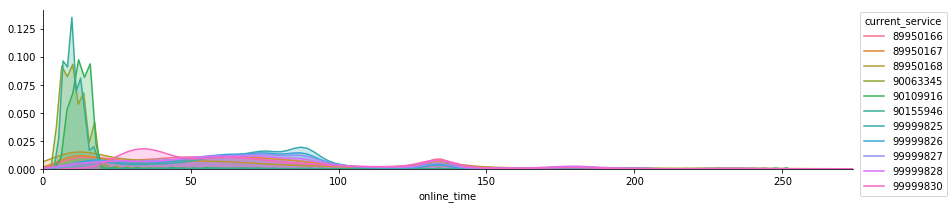

In [7]:
import seaborn as sns
t = train[['online_time',  'current_service']]
facet = sns.FacetGrid(t, hue='current_service', aspect=4)
facet.map(sns.kdeplot, 'online_time', shade=True)
facet.set(xlim=(0,train['online_time'].max()))
facet.add_legend()

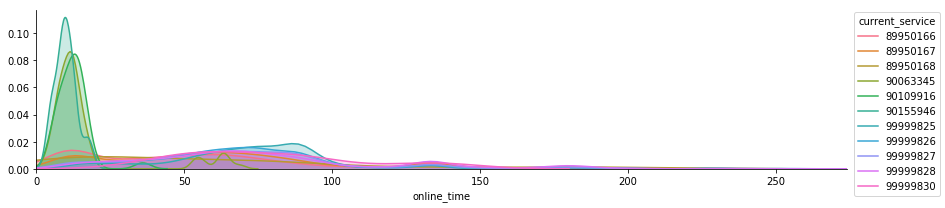

In [11]:
import seaborn as sns
t = train[['online_time',  'current_service']][train['is_mix_service'] == 1]
facet = sns.FacetGrid(t, hue='current_service', aspect=4)
facet.map(sns.kdeplot, 'online_time', shade=True)
facet.set(xlim=(0,train['online_time'].max()))
facet.add_legend()

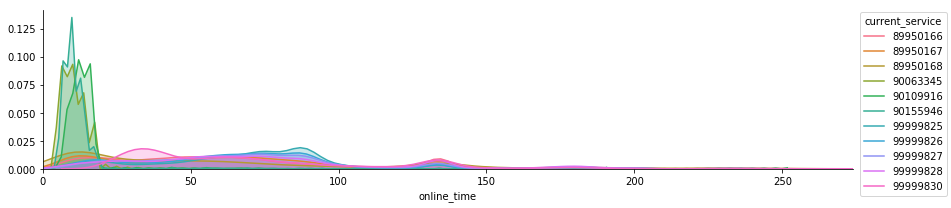

In [12]:
import seaborn as sns
t = train[['online_time',  'current_service']][train['is_mix_service'] == 0]
facet = sns.FacetGrid(t, hue='current_service', aspect=4)
facet.map(sns.kdeplot, 'online_time', shade=True)
facet.set(xlim=(0,train['online_time'].max()))
facet.add_legend()

### 流量数据

month_traffic中90155946、90063345大多数为0

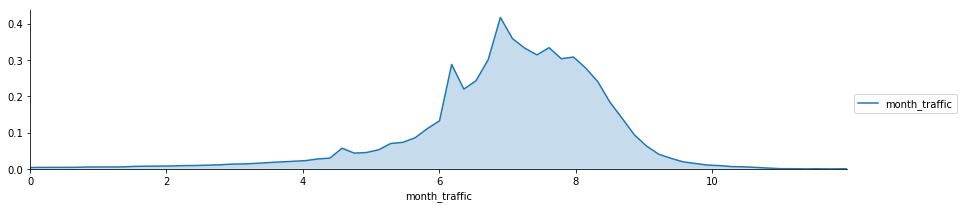

In [37]:
# train.groupby('current_service')['is_mix_service'].mean().plot.bar()
import seaborn as sns
t = train[['month_traffic']]
t['month_traffic'] = np.log(t['month_traffic'])
facet = sns.FacetGrid(t, aspect=4)
facet.map(sns.kdeplot, 'month_traffic', shade=True)
facet.set(xlim=(0,t['month_traffic'].max()))
facet.add_legend()

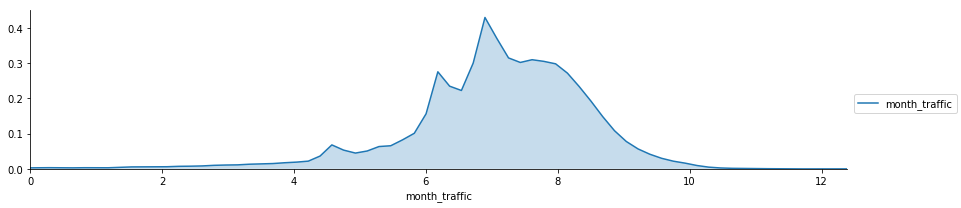

In [39]:
import seaborn as sns
t = test[['month_traffic']]
t['month_traffic'] = np.log(t['month_traffic'])
facet = sns.FacetGrid(t, aspect=4)
facet.map(sns.kdeplot, 'month_traffic', shade=True)
facet.set(xlim=(0,t['month_traffic'].max()))
facet.add_legend()

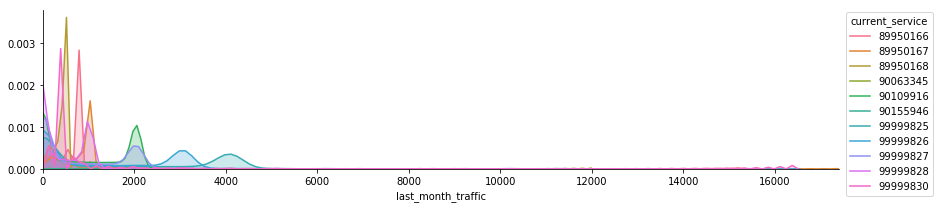

In [303]:
import seaborn as sns
t = train[['last_month_traffic',  'current_service', 'age']]
facet = sns.FacetGrid(t, hue='current_service', aspect=4)
facet.map(sns.kdeplot, 'last_month_traffic', shade=True)
facet.set(xlim=(0,train['last_month_traffic'].max()))
facet.add_legend()

local_trafffic_month 超过8000

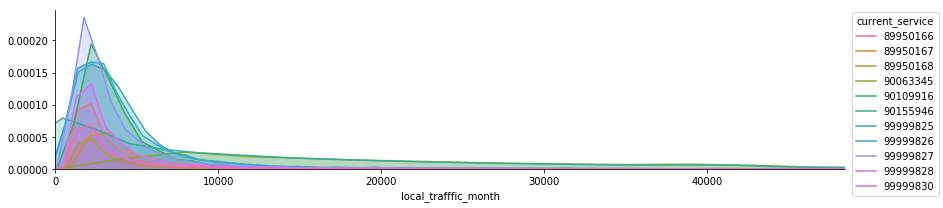

In [255]:
import seaborn as sns
t = train[['local_trafffic_month',  'current_service', 'age']]
facet = sns.FacetGrid(t, hue='current_service', aspect=4)
facet.map(sns.kdeplot, 'local_trafffic_month', shade=True)
facet.set(xlim=(0,train['local_trafffic_month'].max()/10))
facet.add_legend()

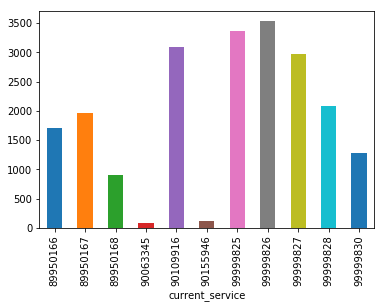

In [216]:
train.groupby('current_service')['month_traffic'].mean().plot.bar()

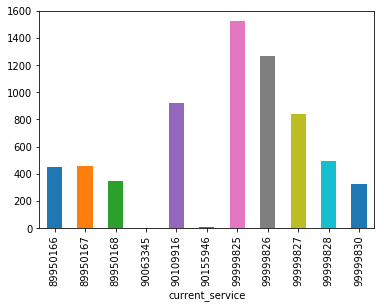

In [218]:
train.groupby('c·urrent_service')['last_month_traffic'].mean().plot.bar()

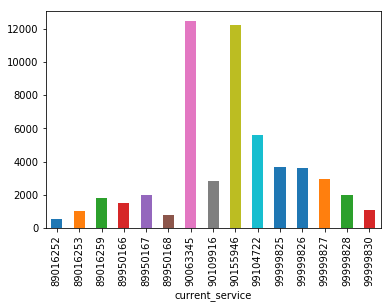

In [22]:
train.groupby('current_service')['local_trafffic_month'].mean().plot.bar()

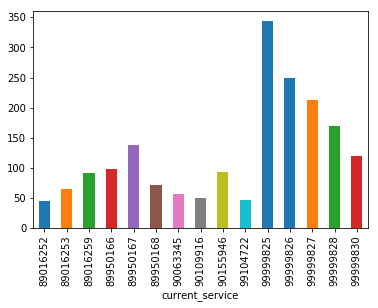

In [24]:
train.groupby('current_service')['1_total_fee'].mean().plot.bar()

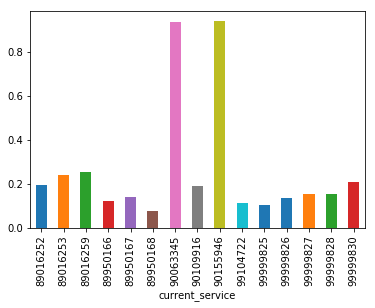

In [25]:
train.groupby('current_service')['many_over_bill'].mean().plot.bar()

[Text(0,0,'89016252'),
 Text(0,0,'89016253'),
 Text(0,0,'89016259'),
 Text(0,0,'89950166'),
 Text(0,0,'89950167'),
 Text(0,0,'89950168'),
 Text(0,0,'90063345'),
 Text(0,0,'90109916'),
 Text(0,0,'90155946'),
 Text(0,0,'99104722'),
 Text(0,0,'99999825'),
 Text(0,0,'99999826'),
 Text(0,0,'99999827'),
 Text(0,0,'99999828'),
 Text(0,0,'99999830')]

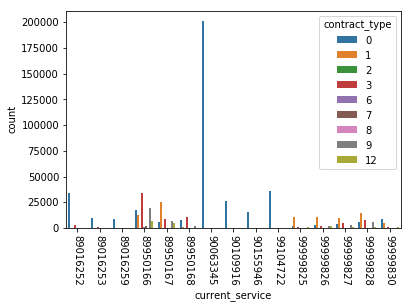

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots()
sns.countplot('current_service', hue='contract_type', data=train, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-90)

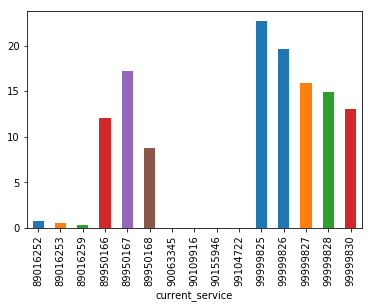

In [27]:
train.groupby('current_service')['contract_time'].mean().plot.bar()

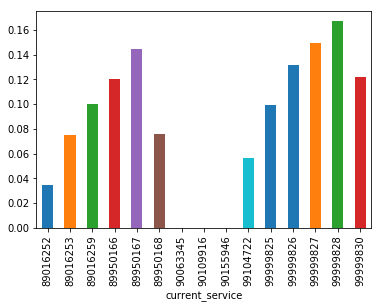

In [28]:
train.groupby('current_service')['is_promise_low_consume'].mean().plot.bar()

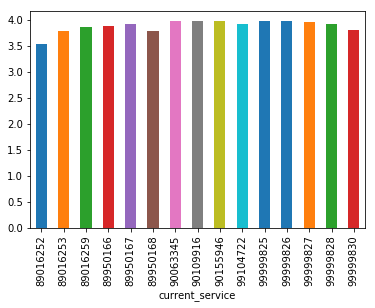

In [29]:
train.groupby('current_service')['net_service'].mean().plot.bar()

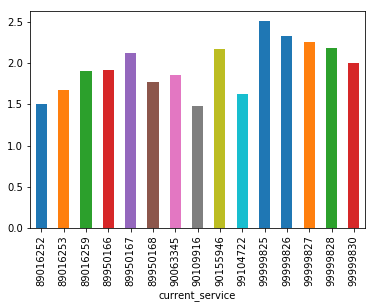

In [30]:
train.groupby('current_service')['pay_times'].mean().plot.bar()

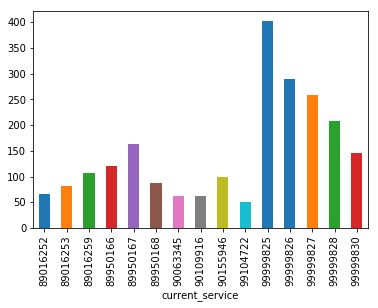

In [31]:
train.groupby('current_service')['pay_num'].mean().plot.bar()

### 语音数据

In [295]:
train[['local_caller_time', 'current_service']].head(10)

,local_caller_time,current_service
0,108.100000,99999825
1,240.100000,90063345
2,27.666667,90109916
3,89.900000,89950166
4,0.000000,99999825
5,14.633333,89950168
6,6.116667,90063345
7,0.866667,99104722
8,250.883333,89950167
9,33.950000,89016252


In [290]:
train[['service2_caller_time']].head(10)

,service2_caller_time
0,564.366667
1,0.000000
2,98.416667
3,121.833333
4,496.733333
5,14.633333
6,0.000000
7,0.014444
8,310.733333
9,33.950000


In [498]:
train[['service1_caller_time']].head(10)

,service1_caller_time
0,0.000000
1,355.166667
2,0.000000
3,74.483333
4,35.100000
5,0.000000
6,136.033333
7,0.000000
8,0.000000
9,0.000000


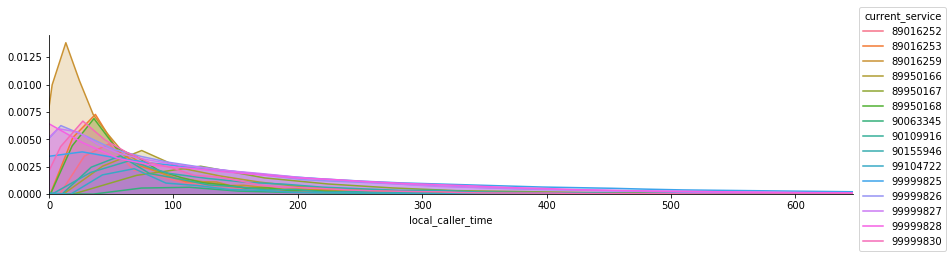

In [298]:
import seaborn as sns
t = train[['local_caller_time',  'current_service']]
facet = sns.FacetGrid(t, hue='current_service', aspect=4)
facet.map(sns.kdeplot, 'local_caller_time', shade=True)
facet.set(xlim=(0,train['local_caller_time'].max()/10))
facet.add_legend()

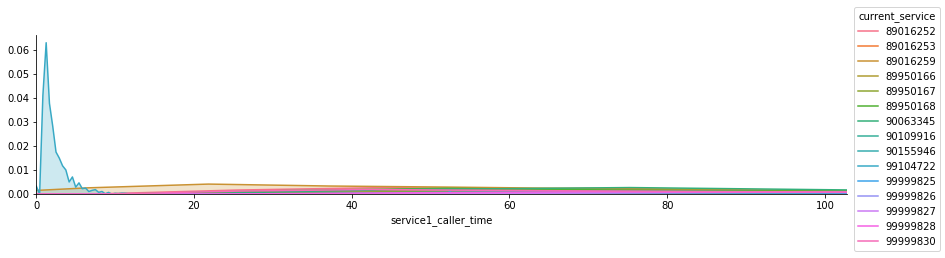

In [493]:
import seaborn as sns
t = train[['service1_caller_time',  'current_service']]
facet = sns.FacetGrid(t, hue='current_service', aspect=4)
facet.map(sns.kdeplot, 'service1_caller_time', shade=True)
facet.set(xlim=(0,train['service1_caller_time'].max()/50))
facet.add_legend()

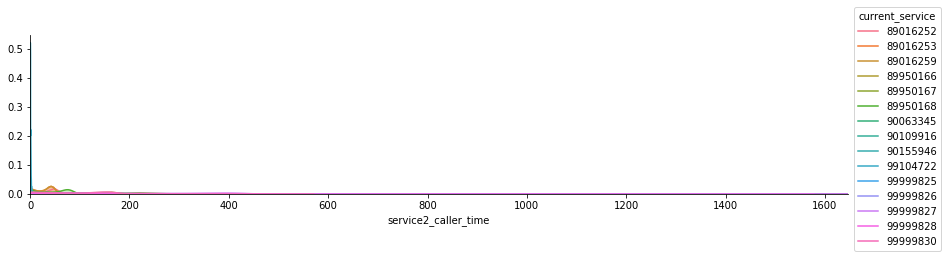

In [310]:
import seaborn as sns
t = train[['service2_caller_time',  'current_service']]
facet = sns.FacetGrid(t, hue='current_service', aspect=4)
facet.map(sns.kdeplot, 'service2_caller_time', shade=True)
facet.set(xlim=(0,train['service2_caller_time'].max()/10))
facet.add_legend()

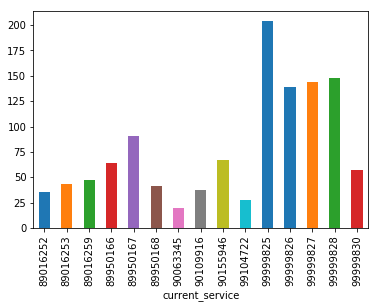

In [32]:
train.groupby('current_service')['local_caller_time'].mean().plot.bar()

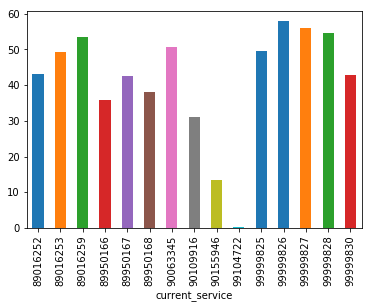

In [263]:
train.groupby('current_service')['service1_caller_time'].mean().plot.bar()

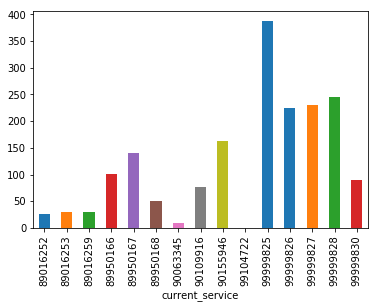

In [262]:
train.groupby('current_service')['service2_caller_time'].mean().plot.bar()

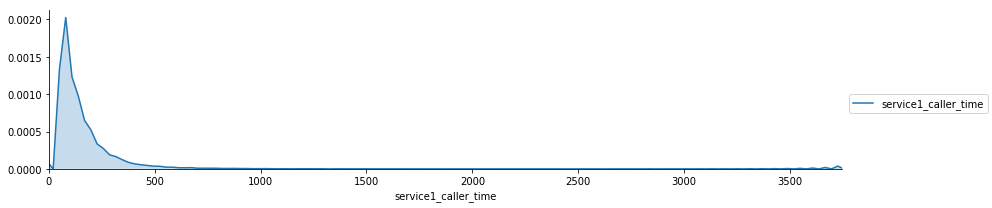

In [49]:
import seaborn as sns
t = test[['service1_caller_time']]
# t['service1_caller_time'] = np.log(t['service1_caller_time'])
facet = sns.FacetGrid(t, aspect=4)
facet.map(sns.kdeplot, 'service1_caller_time', shade=True)
facet.set(xlim=(0,t['service1_caller_time'].max()))
facet.add_legend()

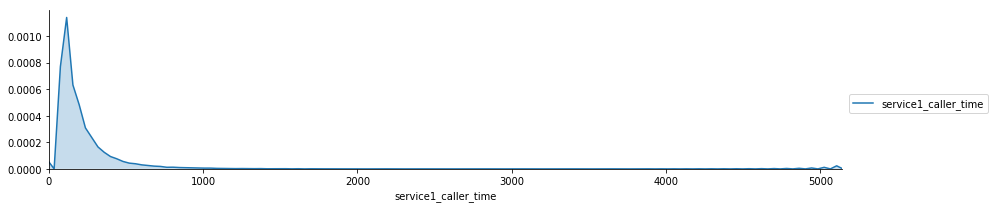

In [50]:
import seaborn as sns
t = train[['service1_caller_time']]
# t['service1_caller_time'] = np.log(t['service1_caller_time'])
facet = sns.FacetGrid(t, aspect=4)
facet.map(sns.kdeplot, 'service1_caller_time', shade=True)
facet.set(xlim=(0,t['service1_caller_time'].max()))
facet.add_legend()


99104722是一个流量卡，语音少，流量多

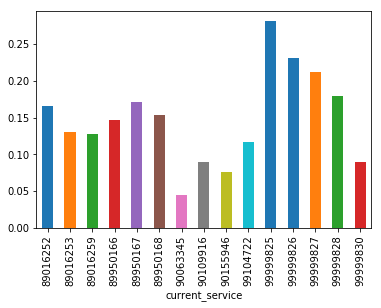

In [36]:
train.groupby('current_service')['complaint_level'].mean().plot.bar()

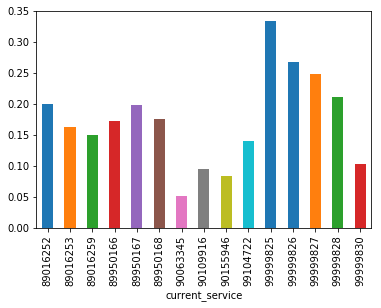

In [37]:
train.groupby('current_service')['former_complaint_num'].mean().plot.bar()

添加补救费用缴费金额是否为0特征

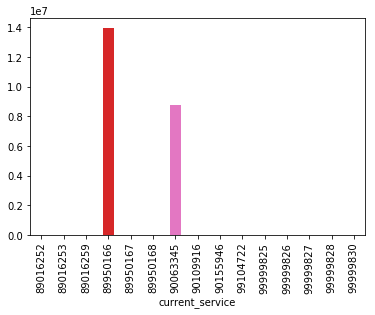

In [38]:
train.groupby('current_service')['former_complaint_fee'].mean().plot.bar()

> 可以添加平均在网时长的消费

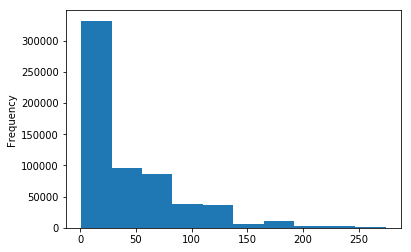

In [39]:
train['online_time'].plot(kind='hist')

2_total_fee和3_total_fee中有'\\N'字段，当做空值来处理，填充平均值

> 费用存在负数，是由于存费送费，可添加特征费用是正数还是负数

> 固移融合的套餐费用上限远高于非固移融合套餐，可以考虑设置一个门限，添加特征，但是由于门限难以确定，可能会过拟合

### 出账金额

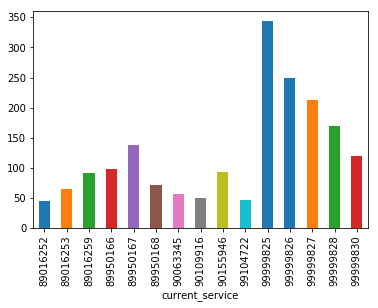

In [18]:
train.groupby('current_service')['1_total_fee'].mean().plot.bar()

In [409]:
train['2_total_fee'][train['2_total_fee']=='\\N'] = np.nan
train['2_total_fee'] = train['2_total_fee'].astype(float)
train['2_total_fee'].fillna(np.mean(train['2_total_fee']), inplace=True)

In [410]:
train['3_total_fee'][train['3_total_fee']=='\\N'] = np.nan
train['3_total_fee'] = train['3_total_fee'].astype(float)
train['3_total_fee'].fillna(np.mean(train['3_total_fee']), inplace=True)

99999830 50-200 89016259 10-180 99999827 100-300

22 33 42.5 53 70 82  103 130 155 185 250 

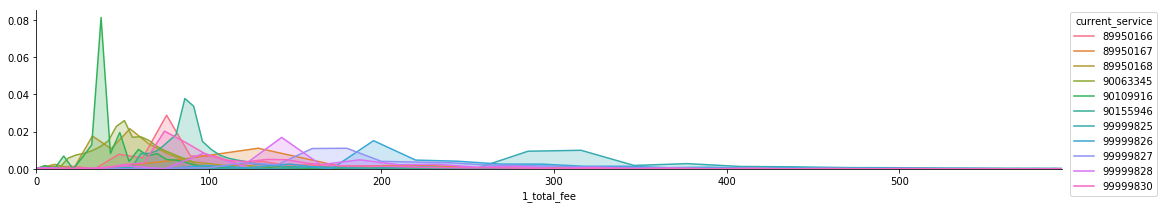

In [52]:
import seaborn as sns

t = train[['1_total_fee',  'current_service']]
facet = sns.FacetGrid(t, hue='current_service', aspect=5)
facet.map(sns.kdeplot, '1_total_fee', shade=True)
facet.set(xlim=(0, train['1_total_fee'].max()/10))
facet.add_legend()

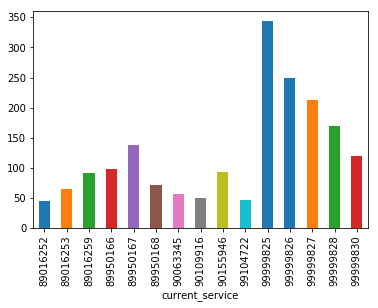

In [396]:
train.groupby('current_service')['1_total_fee'].mean().plot.bar()

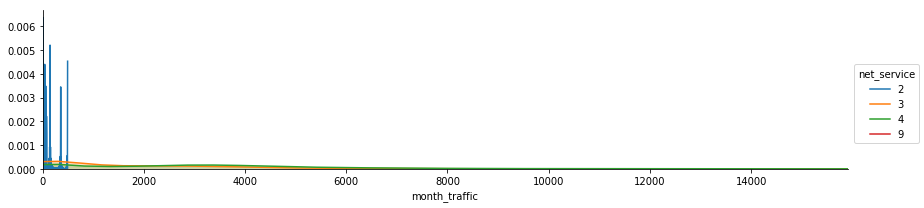

In [511]:
import seaborn as sns

t = train[train['current_service'] == 99999826][['month_traffic',  'net_service']]
facet = sns.FacetGrid(t, hue='net_service', aspect=4)
facet.map(sns.kdeplot, 'month_traffic', shade=True)
facet.set(xlim=(0, train['month_traffic'].max()/10))
facet.add_legend()

# train[train['current_service'] == 90109916]

In [503]:
train['net_service'][train['current_service'] == 89016259].value_counts()

4    8185
3     611
2     295
9       4
Name: net_service, dtype: int64

In [504]:
train['net_service'][train['current_service'] == 99999830].value_counts()

4    12626
3     1523
2      669
9       22
Name: net_service, dtype: int64

In [42]:
print('is mixed max:', max(train['1_total_fee'][train['is_mix_service'] == 1]))
print('isn\'t mixed max:', max(train['1_total_fee'][train['is_mix_service'] == 0]))
print('is mixed min:', min(train['1_total_fee'][train['is_mix_service'] == 1]))
print('isn\'t mixed min:', min(train['1_total_fee'][train['is_mix_service'] == 0]))

is mixed max: 1103.46
isn't mixed max: 5940.83
is mixed min: 0.0
isn't mixed min: 0.0


In [43]:
print('is mixed max:', max(train['2_total_fee'][train['is_mix_service'] == 1]))
print('isn\'t mixed max:', max(train['2_total_fee'][train['is_mix_service'] == 0]))
print('is mixed min:', min(train['2_total_fee'][train['is_mix_service'] == 1]))
print('isn\'t mixed min:', min(train['2_total_fee'][train['is_mix_service'] == 0]))

is mixed max: 1870.91
isn't mixed max: 5825.57
is mixed min: -0.09
isn't mixed min: -287.3


In [44]:
print('is mixed max:', max(train['3_total_fee'][train['is_mix_service'] == 1]))
print('isn\'t mixed max:', max(train['3_total_fee'][train['is_mix_service'] == 0]))
print('is mixed min:', min(train['3_total_fee'][train['is_mix_service'] == 1]))
print('isn\'t mixed min:', min(train['3_total_fee'][train['is_mix_service'] == 0]))

is mixed max: 2223.94
isn't mixed max: 6965.5
is mixed min: -16.05
isn't mixed min: -276.03


每月累计流量范围

In [45]:
print(max(train['month_traffic']))
print(min(train['month_traffic']))

159057.3977880478
0.0


In [46]:
train['many_over_bill'].value_counts()

0    351137
1    261515
Name: many_over_bill, dtype: int64

合约类型

In [47]:
train['contract_type'].value_counts()

0     386469
1      89531
3      74188
9      38379
12     18585
7       2909
6       1911
2        669
8         11
Name: contract_type, dtype: int64

In [48]:
print(max(train['contract_time']))
print(min(train['contract_time']))

52
-1


合约时长超过37，套餐都为同一个，可能过拟合

In [49]:
train['current_service'][train['contract_time']>=37].value_counts()

99999825    15
Name: current_service, dtype: int64

是否承诺低消用户

In [50]:
train['is_promise_low_consume'].value_counts()

0    571663
1     40989
Name: is_promise_low_consume, dtype: int64

In [51]:
train['net_service'].value_counts()

4    569781
3     26142
2     16373
9       356
Name: net_service, dtype: int64

### 付款金额

pay_time和pay_num相乘就是pay_total

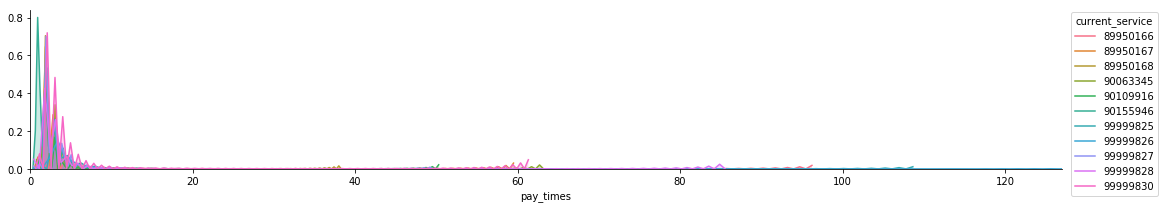

In [225]:
import seaborn as sns

t = train[['pay_times',  'current_service']]
facet = sns.FacetGrid(t, hue='current_service', aspect=5)
facet.map(sns.kdeplot, 'pay_times', shade=True)
facet.set(xlim=(0, train['pay_times'].max()))
facet.add_legend()

In [384]:
train['pay_times'].unique()

array([  2,   3,   4,   1,  12,  10,   7,   8,   6,   5,  13,  22,  11,
         9,  21,  97,  23,  26,  14,  17,  15,  16,  18,  25,  19,  20,
        46,  27,  28,  24,  48,  34,  52,  32,  33,  40,  38,  36,  29,
        39,  85, 127,  98,  30,  37,  72,  43,  41,  45,  51,  61,  49,
        47,  31,  35,  50,  63,  96, 108,  59], dtype=int64)

In [53]:
print(max(train['pay_num']))
print(min(train['pay_num']))

55395.03
0.01


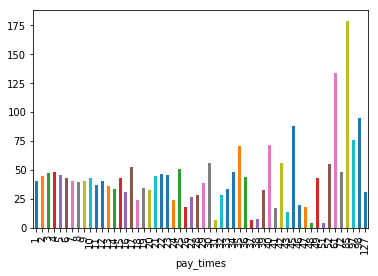

In [422]:
train.groupby('pay_times')['online_time'].mean().plot.bar()

In [54]:
train['complaint_level'].value_counts()

0    550118
1     53749
2      7067
3      1718
Name: complaint_level, dtype: int64

In [231]:
train[train['current_service'] == 89950166]['contract_time'].value_counts()

 12    80281
 0     25013
 24    16259
 36     2665
 11     1712
 13     1615
 23     1218
 15     1137
 7      1040
 26      959
 34      569
 19      334
 30      179
 6       104
 16       49
 9        37
 33       18
 29       16
-1        15
 21        2
 10        2
Name: contract_time, dtype: int64

# 特征工程

## 根据service_type将训练集分为3个数据集

In [10]:
# service3_train = train[train['service_type'] == 3]
# service3_train.to_csv('service3_train.csv')

In [18]:
# service1_train = train[train['service_type'] == 1]
# service1_train.to_csv('service1_train.csv')

### 训练集数据预处理

In [21]:
service4_train = pd.read_csv('train_all.csv')

In [ ]:
train_col = train.columns
for i in train_col:
    train[i] = train[i].replace('\\N', -1)

In [22]:
# service4_train = service4_train.drop(service4_train[service4_train['online_time']<=2].index.tolist())

In [23]:
# service4_train = service4_train.drop(service4_train[service4_train['gender'] == '\\N'].index.tolist())
# service4_train['gender'][service4_train['gender'] == '00'] = 0
# service4_train['gender'][service4_train['gender'] == '01'] = 1
# service4_train['gender'][service4_train['gender'] == '02'] = 2

In [24]:
# service4_train = service4_train.drop(service4_train[service4_train['age'] == '\\N'].index.tolist())
# service4_train['age'] = service4_train['age'].astype(int)

In [25]:
# service4_train['2_total_fee'][service4_train['2_total_fee']=='\\N'] = np.nan
# service4_train['3_total_fee'][service4_train['3_total_fee']=='\\N'] = np.nan
# service4_train['2_total_fee'] = service4_train['2_total_fee'].astype(float)
# service4_train['3_total_fee'] = service4_train['3_total_fee'].astype(float)

### 测试集数据预处理

In [26]:
test = pd.read_csv('republish_test.csv')

In [ ]:
test_col = test.columns
for i in test_col:
    test[i] = test[i].replace('\\N', -1)

In [27]:
# test['2_total_fee'][test['2_total_fee']=='\\N'] = np.nan
# test['2_total_fee'] = test['2_total_fee'].astype(float)
# test['2_total_fee'].fillna(np.mean(test['2_total_fee']), inplace=True)

In [28]:
# test['3_total_fee'][test['3_total_fee']=='\\N'] = np.nan
# test['3_total_fee'] = test['3_total_fee'].astype(float)
# test['3_total_fee'].fillna(np.mean(test['3_total_fee']), inplace=True)

In [29]:
# test3 = test[test['service_type'] == 3]
# test3.to_csv('test3.csv', index=False)
# test1 = test[test['service_type'] == 1]
# test1.to_csv('test1.csv', index=False)
# test4 = test[test['service_type'] == 4]
test.to_csv('test4.csv', index=False)

### 3G数据集

In [14]:
# test3['predict_service'] = 99104722

In [25]:
# predict3 = test3[['user_id', 'predict_service']]

In [26]:
# predict3.to_csv('test3_featured.csv', index=False)

## 对4G数据集进行分析

> is_mix_service 进行one-hot编码 merge on user_id

In [120]:
# is_mix_service = pd.get_dummies(service4_train['is_mix_service'], prefix='is_mix')
# is_mix_service['user_id'] = service4_train['user_id']

In [16]:
# t1 = service4_train[['online_time', 'current_service']]
# t1['same_time_user1'] = 1
# t1 = t1[t1['current_service'] == 90063345].groupby(['online_time', 'current_service']).agg('sum').reset_index()
# t1 = t1.drop('current_service', axis=1)
# t2 = service4_train[['online_time', 'current_service']]
# t2['same_time_user2'] = 1
# t2 = t2[t2['current_service'] == 90109916].groupby(['online_time', 'current_service']).agg('sum').reset_index()
# t2 = t2.drop('current_service', axis=1)
# t3 = service4_train[['online_time', 'current_service']]
# t3['same_time_user3'] = 1
# t3 = t3[t3['current_service'] == 90155946].groupby(['online_time', 'current_service']).agg('sum').reset_index()
# t3 = t3.drop('current_service', axis=1)
# t4 = service4_train[['online_time', 'current_service']]
# t4['same_time_user4'] = 1
# t4 = t4[t4['current_service'] == 89950166].groupby(['online_time', 'current_service']).agg('sum').reset_index()
# t4 = t4.drop('current_service', axis=1)
# t5 = service4_train[['online_time', 'current_service']]
# t5['same_time_user5'] = 1
# t5 = t5[t5['current_service'] == 89950167].groupby(['online_time', 'current_service']).agg('sum').reset_index()
# t5 = t5.drop('current_service', axis=1)
# t6 = service4_train[['online_time', 'current_service']]
# t6['same_time_user6'] = 1
# t6 = t6[t6['current_service'] == 89950168].groupby(['online_time', 'current_service']).agg('sum').reset_index()
# t6 = t6.drop('current_service', axis=1)
# t7 = service4_train[['online_time', 'current_service']]
# t7['same_time_user7'] = 1
# t7 = t7[t7['current_service'] == 99999825].groupby(['online_time', 'current_service']).agg('sum').reset_index()
# t7 = t7.drop('current_service', axis=1)
# t8 = service4_train[['online_time', 'current_service']]
# t8['same_time_user8'] = 1
# t8 = t8[t8['current_service'] == 99999826].groupby(['online_time', 'current_service']).agg('sum').reset_index()
# t8 = t8.drop('current_service', axis=1)
# t9 = service4_train[['online_time', 'current_service']]
# t9['same_time_user9'] = 1
# t9 = t9[t9['current_service'] == 99999827].groupby(['online_time', 'current_service']).agg('sum').reset_index()
# t9 = t9.drop('current_service', axis=1)
# t10 = service4_train[['online_time', 'current_service']]
# t10['same_time_user10'] = 1
# t10 = t10[t10['current_service'] == 99999828].groupby(['online_time', 'current_service']).agg('sum').reset_index()
# t10 = t10.drop('current_service', axis=1)
# t11 = service4_train[['online_time', 'current_service']]
# t11['same_time_user11'] = 1
# t11 = t11[t11['current_service'] == 99999830].groupby(['online_time', 'current_service']).agg('sum').reset_index()
# t11 = t11.drop('current_service', axis=1)

In [17]:
# online_time = pd.merge(t1, t2, on=['online_time'])
# online_time = pd.merge(online_time, t3, on=['online_time'])
# online_time = pd.merge(online_time, t4, on=['online_time'])
# online_time = pd.merge(online_time, t5, on=['online_time'])
# online_time = pd.merge(online_time, t6, on=['online_time'])
# online_time = pd.merge(online_time, t7, on=['online_time'])
# online_time = pd.merge(online_time, t8, on=['online_time'])
# online_time = pd.merge(online_time, t9, on=['online_time'])
# online_time = pd.merge(online_time, t10, on=['online_time'])
# online_time = pd.merge(online_time, t11, on=['online_time'])

#### online_time **商品特征**——在网时长 merge on online_time

89950166 89950167 99999828 89950168 

99999827 99999826 99999830 99999825 

90063345 90109916 90155946

In [32]:
test4 = pd.read_csv('test4.csv')

lgb内部能自动划分区间，所以将连续变量划分为多个区间或是划分为大于n小于n的特征可能没有意义

In [97]:
online_time = service4_train[['online_time', 'user_id']]
online_time['user_num'] = 1
user_num = online_time.groupby('online_time').agg('sum').reset_index()
online_time = online_time.drop('user_num', axis=1)
online_time = pd.merge(online_time, user_num, on='online_time')
# online_time['online_time_len'] = (online_time['online_time'] <= 25).astype(int)

In [98]:
online_time = online_time.drop('online_time', axis=1)

In [99]:
online_time_test = test4[['online_time', 'user_id']]
online_time_test['user_num'] = 1
user_num_test = online_time_test.groupby('online_time').agg('sum').reset_index()
online_time_test = online_time_test.drop('user_num', axis=1)
online_time_test = pd.merge(online_time_test, user_num_test, on='online_time')
# online_time_test['online_time_len'] = (online_time_test['online_time'] <= 25).astype(int)

In [100]:
online_time_test = online_time_test.drop('online_time', axis=1)

#### online_mix 在网时长和是否固移融合 merge on user_id

In [18]:
online_mix = service4_train[['online_time', 'is_mix_service', 'user_id']]
online_mix['many_online_mix'] = 0
online_mix['many_online_mix'][(online_mix['is_mix_service'] == 1) & (online_mix['online_time'] >= 87)] = 1
online_mix['little_online_mix'] = 0
online_mix['little_online_mix'][(online_mix['is_mix_service'] == 1) & (online_mix['online_time'] < 87)] = 1
online_mix['many_online_notmix'] = 0
online_mix['many_online_notmix'][(online_mix['is_mix_service'] == 0) & (online_mix['online_time'] >= 87)] = 1
online_mix['little_online_notmix'] = 0
online_mix['little_online_notmix'][(online_mix['is_mix_service'] == 0) & (online_mix['online_time'] < 87)] = 1

In [19]:
online_mix = online_mix.drop(['online_time', 'is_mix_service'], axis=1)

In [20]:
online_mix_test = test4[['online_time', 'is_mix_service', 'user_id']]
online_mix_test['many_online_mix'] = 0
online_mix_test['many_online_mix'][(online_mix_test['is_mix_service'] == 1) & (online_mix_test['online_time'] >= 87)] = 1
online_mix_test['little_online_mix'] = 0
online_mix_test['little_online_mix'][(online_mix_test['is_mix_service'] == 1) & (online_mix_test['online_time'] < 87)] = 1
online_mix_test['many_online_notmix'] = 0
online_mix_test['many_online_notmix'][(online_mix_test['is_mix_service'] == 0) & (online_mix_test['online_time'] >= 87)] = 1
online_mix_test['little_online_notmix'] = 0
online_mix_test['little_online_notmix'][(online_mix_test['is_mix_service'] == 0) & (online_mix_test['online_time'] < 87)] = 1

In [21]:
online_mix_test = online_mix_test.drop(['online_time', 'is_mix_service'], axis=1)

#### total_fee (merge on user_id)

连续4个月的总费用及增加（减少）量

In [35]:
total_fee = service4_train[['user_id', '1_total_fee', '2_total_fee', '3_total_fee', '4_total_fee', 'online_time', 'month_traffic',
                            'last_month_traffic','local_caller_time','service1_caller_time','service2_caller_time','pay_num',
                            'pay_times', 'many_over_bill']]
# total_fee['12_fee'] = total_fee['1_total_fee'] - total_fee['2_total_fee']
# total_fee['23_fee'] = total_fee['2_total_fee'] - total_fee['3_total_fee']
# total_fee['34_fee'] = total_fee['3_total_fee'] - total_fee['4_total_fee']
# total_fee['remain_fee'] = total_fee['1_total_fee'] - total_fee['month_traffic']*0.3
# total_fee['base_fee'] = (total_fee['month_traffic']-total_fee['last_month_traffic'])*0.3+total_fee['local_caller_time']*0.15
# total_fee['every_call'] = (total_fee['1_total_fee'] - total_fee['month_traffic'])
# total_fee['last_remain_fee'] = total_fee['2_total_fee'] - total_fee['service1_caller_time']*0.15
# total_fee['last2_remain_fee'] = total_fee['3_total_fee'] - total_fee['service2_caller_time']*0.15
# total_fee['pay_diff_fee'] = (total_fee['1_total_fee']+total_fee['2_total_fee']
#                              +total_fee['3_total_fee']+total_fee['4_total_fee']) / total_fee['pay_num']
# total_fee['pay_diff_fee'] = total_fee['1_total_fee'] - total_fee['pay_num']

total_fee['fee_mean'] = total_fee.loc[:, '1_total_fee':'4_total_fee'].mean(axis=1)
total_fee['fee_var'] = total_fee.loc[:, '1_total_fee':'4_total_fee'].var(axis=1)
total_fee['fee_median'] = total_fee.loc[:, '1_total_fee':'4_total_fee'].median(axis=1)
total_fee['fee_max'] = total_fee.loc[:, '1_total_fee':'4_total_fee'].max(axis=1)
total_fee['fee_min'] = total_fee.loc[:, '1_total_fee':'4_total_fee'].min(axis=1)

total_fee['fee_to1'] = (total_fee['1_total_fee']-total_fee['fee_mean'])/total_fee['fee_var']
total_fee['fee_to2'] = (total_fee['2_total_fee']-total_fee['fee_mean'])/total_fee['fee_var']
total_fee['fee_to3'] = (total_fee['3_total_fee']-total_fee['fee_mean'])/total_fee['fee_var']
total_fee['fee_to4'] = (total_fee['4_total_fee']-total_fee['fee_mean'])/total_fee['fee_var']

In [37]:
total_fee.head()

,user_id,fee_mean,fee_var,fee_median,fee_max,fee_min,fee_to1
0,Gx4sJzcQog01UhZL,296.2400,0.150400,296.100,296.80,295.96,-1.861702
1,kEXrhTiug93DIcLG,227.3500,1908.963333,234.850,265.20,174.50,0.019828
2,AouXr0EOUtSRdiYK,61.2750,140.249167,65.200,70.20,44.50,-0.119609
3,Yds7U30hnRZDiLtb,83.4125,34.490625,84.675,88.30,76.00,0.131557
4,OFDTSXrhN9Q2mbVw,369.9200,4025.548333,365.045,435.51,314.08,-0.013136


In [36]:
total_fee = total_fee.drop([ '1_total_fee', '2_total_fee', '3_total_fee', '4_total_fee', 'online_time', 'month_traffic','local_caller_time',
                            'service1_caller_time', 'service2_caller_time', 'pay_num', 'pay_times', 'many_over_bill',
                            'last_month_traffic'], axis=1)

In [187]:
total_fee_test = test4[['user_id', '1_total_fee', '2_total_fee', '3_total_fee', '4_total_fee', 'online_time', 'month_traffic',
                        'last_month_traffic', 'local_caller_time', 'service1_caller_time', 'service2_caller_time',
                        'pay_num', 'pay_times', 'many_over_bill']]
# total_fee_test['12_fee'] = total_fee_test['1_total_fee'] - total_fee_test['2_total_fee']
# total_fee_test['23_fee'] = total_fee_test['2_total_fee'] - total_fee_test['3_total_fee']
# total_fee_test['34_fee'] = total_fee_test['3_total_fee'] - total_fee_test['4_total_fee']
# total_fee_test['remain_fee'] = total_fee_test['1_total_fee'] - total_fee_test['month_traffic']*0.3
# total_fee_test['base_fee']=(total_fee_test['month_traffic']-total_fee_test['last_month_traffic'])*0.3+total_fee_test['local_caller_time']*0.15
# total_fee_test['every_call'] = (total_fee_test['1_total_fee'] - total_fee_test['month_traffic'])
# total_fee_test['last_remain_fee'] = total_fee_test['2_total_fee'] - total_fee_test['service1_caller_time']*0.15
# total_fee_test['last2_remain_fee'] = total_fee_test['3_total_fee'] - total_fee_test['service2_caller_time']*0.15
# total_fee_test['pay_diff_fee'] = (total_fee_test['1_total_fee']+total_fee_test['2_total_fee']
#                              +total_fee_test['3_total_fee']+total_fee_test['4_total_fee']) / total_fee_test['pay_num']
# total_fee_test['pay_diff_fee'] = total_fee_test['1_total_fee'] - total_fee_test['pay_num']

total_fee_test['fee_mean'] = total_fee_test.loc[:, '1_total_fee':'4_total_fee'].mean(axis=1)
total_fee_test['fee_var'] = total_fee_test.loc[:, '1_total_fee':'4_total_fee'].var(axis=1)
total_fee_test['fee_median'] = total_fee_test.loc[:, '1_total_fee':'4_total_fee'].median(axis=1)
total_fee_test['fee_max'] = total_fee_test.loc[:, '1_total_fee':'4_total_fee'].max(axis=1)
total_fee_test['fee_min'] = total_fee_test.loc[:, '1_total_fee':'4_total_fee'].min(axis=1)

total_fee_test['fee_to1'] = (total_fee_test['1_total_fee']-total_fee_test['fee_mean'])/total_fee_test['fee_var']
total_fee_test['fee_to2'] = (total_fee_test['2_total_fee']-total_fee_test['fee_mean'])/total_fee_test['fee_var']
total_fee_test['fee_to3'] = (total_fee_test['3_total_fee']-total_fee_test['fee_mean'])/total_fee_test['fee_var']
total_fee_test['fee_to4'] = (total_fee_test['4_total_fee']-total_fee_test['fee_mean'])/total_fee_test['fee_var']

In [188]:
total_fee_test = total_fee_test.drop(['1_total_fee', '2_total_fee', '3_total_fee', '4_total_fee', 'online_time', 'month_traffic',
                                      'local_caller_time', 'service1_caller_time', 'service2_caller_time', 'pay_num', 'pay_times', 
                                      'many_over_bill', 'last_month_traffic'], axis=1)

In [26]:
# total_fee['1total_fee1'] = 0
# total_fee['1total_fee1'][total_fee['1_total_fee']<22] = 0
# total_fee['1total_fee2'] = 0
# total_fee['1total_fee2'][(total_fee['1_total_fee']>=22) & (total_fee['1_total_fee']<33)] = 0
# total_fee['1total_fee3'] = 0
# total_fee['1total_fee3'][(total_fee['1_total_fee']>=33) & (total_fee['1_total_fee']<42.5)] = 0
# total_fee['1total_fee4'] = 0
# total_fee['1total_fee4'][(total_fee['1_total_fee']>=42.5) & (total_fee['1_total_fee']<53)] = 0
# total_fee['1total_fee5'] = 0
# total_fee['1total_fee5'][(total_fee['1_total_fee']>=53) & (total_fee['1_total_fee']<70)] = 0
# total_fee['1total_fee6'] = 0
# total_fee['1total_fee6'][(total_fee['1_total_fee']>=70) & (total_fee['1_total_fee']<82)] = 0
# total_fee['1total_fee7'] = 0
# total_fee['1total_fee7'][(total_fee['1_total_fee']>=82) & (total_fee['1_total_fee']<103)] = 0
# total_fee['1total_fee8'] = 0
# total_fee['1total_fee8'][(total_fee['1_total_fee']>=103) & (total_fee['1_total_fee']<130)] = 0
# total_fee['1total_fee9'] = 0
# total_fee['1total_fee9'][(total_fee['1_total_fee']>=130) & (total_fee['1_total_fee']<150)] = 0
# total_fee['1total_fee10'] = 0
# total_fee['1total_fee10'][(total_fee['1_total_fee']>=150) & (total_fee['1_total_fee']<185)] = 0
# total_fee['1total_fee11'] = 0
# total_fee['1total_fee11'][(total_fee['1_total_fee']>=185) & (total_fee['1_total_fee']<250)] = 0
# total_fee['1total_fee12'] = 0
# total_fee['1total_fee12'][(total_fee['1_total_fee']>=250) & (total_fee['1_total_fee']<400)] = 0
# total_fee['1total_fee13'] = 0
# total_fee['1total_fee13'][(total_fee['1_total_fee']>=400)] = 0

In [27]:
# total_fee['1_ave_online_fee'] = total_fee['1_total_fee'] * total_fee['online_time']
# total_fee['2_ave_online_fee'] = total_fee['2_total_fee'] * total_fee['online_time']
# total_fee['3_ave_online_fee'] = total_fee['3_total_fee'] * total_fee['online_time']
# total_fee['4_ave_online_fee'] = total_fee['4_total_fee'] * total_fee['online_time']

每个月的费用是正数还是负数

In [28]:
# total_fee['1_pos_neg'] = 0
# total_fee['2_pos_neg'] = 0
# total_fee['3_pos_neg'] = 0
# total_fee['4_pos_neg'] = 0
# total_fee['1_pos_neg'][total_fee['1_total_fee'] >= 0] = 1
# total_fee['2_pos_neg'][total_fee['2_total_fee'] >= 0] = 1
# total_fee['3_pos_neg'][total_fee['3_total_fee'] >= 0] = 1
# total_fee['4_pos_neg'][total_fee['4_total_fee'] >= 0] = 1

月消费是否大于3000

In [29]:
# total_fee['1_out_3000'] = 0
# total_fee['2_out_3000'] = 0
# total_fee['3_out_3000'] = 0
# total_fee['4_out_3000'] = 0
# total_fee['1_out_3000'][total_fee['1_total_fee'] >= 3000] = 1
# total_fee['2_out_3000'][total_fee['2_total_fee'] >= 3000] = 1
# total_fee['3_out_3000'][total_fee['3_total_fee'] >= 3000] = 1
# total_fee['4_out_3000'][total_fee['4_total_fee'] >= 3000] = 1

平均每在网时长的消费

> **商品特征**——每月最低消费

根据online_time特征上套餐的相似度，可以分为

第一组：89016252、89016253、89016259

第二组：89950166、89950167、89950168

第三组：99999825、99999826、99999827、99999828、99999830

In [30]:
# fee_t1 = service4_train[['current_service', '1_total_fee']]
# fee1_mean1 = fee_t1['1_total_fee'][fee_t1['current_service'] == 89016252].mean()
# fee1_mean2 = fee_t1['1_total_fee'][fee_t1['current_service'] == 89016253].mean()
# fee1_mean3 = fee_t1['1_total_fee'][fee_t1['current_service'] == 89016259].mean()
# fee1_mean4 = fee_t1['1_total_fee'][fee_t1['current_service'] == 89950166].mean()
# fee1_mean5 = fee_t1['1_total_fee'][fee_t1['current_service'] == 89950167].mean()
# fee1_mean6 = fee_t1['1_total_fee'][fee_t1['current_service'] == 89950168].mean()
# fee1_mean7 = fee_t1['1_total_fee'][fee_t1['current_service'] == 99999825].mean()
# fee1_mean8 = fee_t1['1_total_fee'][fee_t1['current_service'] == 99999826].mean()
# fee1_mean9 = fee_t1['1_total_fee'][fee_t1['current_service'] == 99999827].mean()
# fee1_mean10 = fee_t1['1_total_fee'][fee_t1['current_service'] == 99999828].mean()
# fee1_mean11 = fee_t1['1_total_fee'][fee_t1['current_service'] == 99999830].mean()

# fee_t2 = service4_train[['current_service', '2_total_fee']]
# fee2_mean1 = fee_t2['2_total_fee'][fee_t2['current_service'] == 89016252].mean()
# fee2_mean2 = fee_t2['2_total_fee'][fee_t2['current_service'] == 89016253].mean()
# fee2_mean3 = fee_t2['2_total_fee'][fee_t2['current_service'] == 89016259].mean()
# fee2_mean4 = fee_t2['2_total_fee'][fee_t2['current_service'] == 89950166].mean()
# fee2_mean5 = fee_t2['2_total_fee'][fee_t2['current_service'] == 89950167].mean()
# fee2_mean6 = fee_t2['2_total_fee'][fee_t2['current_service'] == 89950168].mean()
# fee2_mean7 = fee_t2['2_total_fee'][fee_t2['current_service'] == 99999825].mean()
# fee2_mean8 = fee_t2['2_total_fee'][fee_t2['current_service'] == 99999826].mean()
# fee2_mean9 = fee_t2['2_total_fee'][fee_t2['current_service'] == 99999827].mean()
# fee2_mean10 = fee_t2['2_total_fee'][fee_t2['current_service'] == 99999828].mean()
# fee2_mean11 = fee_t2['2_total_fee'][fee_t2['current_service'] == 99999830].mean()

# fee_t3 = service4_train[['current_service', '3_total_fee']]
# fee3_mean1 = fee_t3['3_total_fee'][fee_t3['current_service'] == 89016252].mean()
# fee3_mean2 = fee_t3['3_total_fee'][fee_t3['current_service'] == 89016253].mean()
# fee3_mean3 = fee_t3['3_total_fee'][fee_t3['current_service'] == 89016259].mean()
# fee3_mean4 = fee_t3['3_total_fee'][fee_t3['current_service'] == 89950166].mean()
# fee3_mean5 = fee_t3['3_total_fee'][fee_t3['current_service'] == 89950167].mean()
# fee3_mean6 = fee_t3['3_total_fee'][fee_t3['current_service'] == 89950168].mean()
# fee3_mean7 = fee_t3['3_total_fee'][fee_t3['current_service'] == 99999825].mean()
# fee3_mean8 = fee_t3['3_total_fee'][fee_t3['current_service'] == 99999826].mean()
# fee3_mean9 = fee_t3['3_total_fee'][fee_t3['current_service'] == 99999827].mean()
# fee3_mean10 = fee_t3['3_total_fee'][fee_t3['current_service'] == 99999828].mean()
# fee3_mean11 = fee_t3['3_total_fee'][fee_t3['current_service'] == 99999830].mean()

# fee_t4 = service4_train[['current_service', '4_total_fee']]
# fee4_mean1 = fee_t4['4_total_fee'][fee_t4['current_service'] == 89016252].mean()
# fee4_mean2 = fee_t4['4_total_fee'][fee_t4['current_service'] == 89016253].mean()
# fee4_mean3 = fee_t4['4_total_fee'][fee_t4['current_service'] == 89016259].mean()
# fee4_mean4 = fee_t4['4_total_fee'][fee_t4['current_service'] == 89950166].mean()
# fee4_mean5 = fee_t4['4_total_fee'][fee_t4['current_service'] == 89950167].mean()
# fee4_mean6 = fee_t4['4_total_fee'][fee_t4['current_service'] == 89950168].mean()
# fee4_mean7 = fee_t4['4_total_fee'][fee_t4['current_service'] == 99999825].mean()
# fee4_mean8 = fee_t4['4_total_fee'][fee_t4['current_service'] == 99999826].mean()
# fee4_mean9 = fee_t4['4_total_fee'][fee_t4['current_service'] == 99999827].mean()
# fee4_mean10 = fee_t4['4_total_fee'][fee_t4['current_service'] == 99999828].mean()
# fee4_mean11 = fee_t4['4_total_fee'][fee_t4['current_service'] == 99999830].mean()

In [31]:
# total_fee['1_diff_fee1'] = fee_t1['1_total_fee'] - fee1_mean1
# total_fee['1_diff_fee2'] = fee_t1['1_total_fee'] - fee1_mean2
# total_fee['1_diff_fee3'] = fee_t1['1_total_fee'] - fee1_mean3
# total_fee['1_diff_fee4'] = fee_t1['1_total_fee'] - fee1_mean4
# total_fee['1_diff_fee5'] = fee_t1['1_total_fee'] - fee1_mean5
# total_fee['1_diff_fee6'] = fee_t1['1_total_fee'] - fee1_mean6
# total_fee['1_diff_fee7'] = fee_t1['1_total_fee'] - fee1_mean7
# total_fee['1_diff_fee8'] = fee_t1['1_total_fee'] - fee1_mean8
# total_fee['1_diff_fee9'] = fee_t1['1_total_fee'] - fee1_mean9
# total_fee['1_diff_fee10'] = fee_t1['1_total_fee'] - fee1_mean10
# total_fee['1_diff_fee11'] = fee_t1['1_total_fee'] - fee1_mean11

# total_fee['2_diff_fee1'] = fee_t2['2_total_fee'] - fee2_mean1
# total_fee['2_diff_fee2'] = fee_t2['2_total_fee'] - fee2_mean2
# total_fee['2_diff_fee3'] = fee_t2['2_total_fee'] - fee2_mean3
# total_fee['2_diff_fee4'] = fee_t2['2_total_fee'] - fee2_mean4
# total_fee['2_diff_fee5'] = fee_t2['2_total_fee'] - fee2_mean5
# total_fee['2_diff_fee6'] = fee_t2['2_total_fee'] - fee2_mean6
# total_fee['2_diff_fee7'] = fee_t2['2_total_fee'] - fee2_mean7
# total_fee['2_diff_fee8'] = fee_t2['2_total_fee'] - fee2_mean8
# total_fee['2_diff_fee9'] = fee_t2['2_total_fee'] - fee2_mean9
# total_fee['2_diff_fee10'] = fee_t2['2_total_fee'] - fee2_mean10
# total_fee['2_diff_fee11'] = fee_t2['2_total_fee'] - fee2_mean11

# total_fee['3_diff_fee1'] = fee_t3['3_total_fee'] - fee3_mean1
# total_fee['3_diff_fee2'] = fee_t3['3_total_fee'] - fee3_mean2
# total_fee['3_diff_fee3'] = fee_t3['3_total_fee'] - fee3_mean3
# total_fee['3_diff_fee4'] = fee_t3['3_total_fee'] - fee3_mean4
# total_fee['3_diff_fee5'] = fee_t3['3_total_fee'] - fee3_mean5
# total_fee['3_diff_fee6'] = fee_t3['3_total_fee'] - fee3_mean6
# total_fee['3_diff_fee7'] = fee_t3['3_total_fee'] - fee3_mean7
# total_fee['3_diff_fee8'] = fee_t3['3_total_fee'] - fee3_mean8
# total_fee['3_diff_fee9'] = fee_t3['3_total_fee'] - fee3_mean9
# total_fee['3_diff_fee10'] = fee_t3['3_total_fee'] - fee3_mean10
# total_fee['3_diff_fee11'] = fee_t3['3_total_fee'] - fee3_mean11

# total_fee['4_diff_fee1'] = fee_t4['4_total_fee'] - fee4_mean1
# total_fee['4_diff_fee2'] = fee_t4['4_total_fee'] - fee4_mean2
# total_fee['4_diff_fee3'] = fee_t4['4_total_fee'] - fee4_mean3
# total_fee['4_diff_fee4'] = fee_t4['4_total_fee'] - fee4_mean4
# total_fee['4_diff_fee5'] = fee_t4['4_total_fee'] - fee4_mean5
# total_fee['4_diff_fee6'] = fee_t4['4_total_fee'] - fee4_mean6
# total_fee['4_diff_fee7'] = fee_t4['4_total_fee'] - fee4_mean7
# total_fee['4_diff_fee8'] = fee_t4['4_total_fee'] - fee4_mean8
# total_fee['4_diff_fee9'] = fee_t4['4_total_fee'] - fee4_mean9
# total_fee['4_diff_fee10'] = fee_t4['4_total_fee'] - fee4_mean10
# total_fee['4_diff_fee11'] = fee_t4['4_total_fee'] - fee4_mean11

In [32]:
# total_fee_test['1_ave_online_fee'] = total_fee_test['1_total_fee'] * total_fee_test['online_time']
# total_fee_test['2_ave_online_fee'] = total_fee_test['2_total_fee'] * total_fee_test['online_time']
# total_fee_test['3_ave_online_fee'] = total_fee_test['3_total_fee'] * total_fee_test['online_time']
# total_fee_test['4_ave_online_fee'] = total_fee_test['4_total_fee'] * total_fee_test['online_time']

In [33]:
# total_fee_test['1_pos_neg'] = 0
# total_fee_test['2_pos_neg'] = 0
# total_fee_test['3_pos_neg'] = 0
# total_fee_test['4_pos_neg'] = 0
# total_fee_test['1_pos_neg'][total_fee_test['1_total_fee'] >= 0] = 1
# total_fee_test['2_pos_neg'][total_fee_test['2_total_fee'] >= 0] = 1
# total_fee_test['3_pos_neg'][total_fee_test['3_total_fee'] >= 0] = 1
# total_fee_test['4_pos_neg'][total_fee_test['4_total_fee'] >= 0] = 1

In [34]:
# total_fee_test['1_out_3000'] = 0
# total_fee_test['2_out_3000'] = 0
# total_fee_test['3_out_3000'] = 0
# total_fee_test['4_out_3000'] = 0
# total_fee_test['1_out_3000'][test4['1_total_fee'] >= 3000] = 1
# total_fee_test['2_out_3000'][test4['2_total_fee'] >= 3000] = 1
# total_fee_test['3_out_3000'][test4['3_total_fee'] >= 3000] = 1
# total_fee_test['4_out_3000'][test4['4_total_fee'] >= 3000] = 1

In [35]:
# total_fee_test['1_diff_fee1'] = test4['1_total_fee'] - fee1_mean1
# total_fee_test['1_diff_fee2'] = test4['1_total_fee'] - fee1_mean2
# total_fee_test['1_diff_fee3'] = test4['1_total_fee'] - fee1_mean3
# total_fee_test['1_diff_fee4'] = test4['1_total_fee'] - fee1_mean4
# total_fee_test['1_diff_fee5'] = test4['1_total_fee'] - fee1_mean5
# total_fee_test['1_diff_fee6'] = test4['1_total_fee'] - fee1_mean6
# total_fee_test['1_diff_fee7'] = test4['1_total_fee'] - fee1_mean7
# total_fee_test['1_diff_fee8'] = test4['1_total_fee'] - fee1_mean8
# total_fee_test['1_diff_fee9'] = test4['1_total_fee'] - fee1_mean9
# total_fee_test['1_diff_fee10'] = test4['1_total_fee'] - fee1_mean10
# total_fee_test['1_diff_fee11'] = test4['1_total_fee'] - fee1_mean11

# total_fee_test['2_diff_fee1'] = test4['2_total_fee'] - fee2_mean1
# total_fee_test['2_diff_fee2'] = test4['2_total_fee'] - fee2_mean2
# total_fee_test['2_diff_fee3'] = test4['2_total_fee'] - fee2_mean3
# total_fee_test['2_diff_fee4'] = test4['2_total_fee'] - fee2_mean4
# total_fee_test['2_diff_fee5'] = test4['2_total_fee'] - fee2_mean5
# total_fee_test['2_diff_fee6'] = test4['2_total_fee'] - fee2_mean6
# total_fee_test['2_diff_fee7'] = test4['2_total_fee'] - fee2_mean7
# total_fee_test['2_diff_fee8'] = test4['2_total_fee'] - fee2_mean8
# total_fee_test['2_diff_fee9'] = test4['2_total_fee'] - fee2_mean9
# total_fee_test['2_diff_fee10'] = test4['2_total_fee'] - fee2_mean10
# total_fee_test['2_diff_fee11'] = test4['2_total_fee'] - fee2_mean11

# total_fee_test['3_diff_fee1'] = test4['3_total_fee'] - fee3_mean1
# total_fee_test['3_diff_fee2'] = test4['3_total_fee'] - fee3_mean2
# total_fee_test['3_diff_fee3'] = test4['3_total_fee'] - fee3_mean3
# total_fee_test['3_diff_fee4'] = test4['3_total_fee'] - fee3_mean4
# total_fee_test['3_diff_fee5'] = test4['3_total_fee'] - fee3_mean5
# total_fee_test['3_diff_fee6'] = test4['3_total_fee'] - fee3_mean6
# total_fee_test['3_diff_fee7'] = test4['3_total_fee'] - fee3_mean7
# total_fee_test['3_diff_fee8'] = test4['3_total_fee'] - fee3_mean8
# total_fee_test['3_diff_fee9'] = test4['3_total_fee'] - fee3_mean9
# total_fee_test['3_diff_fee10'] = test4['3_total_fee'] - fee3_mean10
# total_fee_test['3_diff_fee11'] = test4['3_total_fee'] - fee3_mean11

# total_fee_test['4_diff_fee1'] = test4['4_total_fee'] - fee4_mean1
# total_fee_test['4_diff_fee2'] = test4['4_total_fee'] - fee4_mean2
# total_fee_test['4_diff_fee3'] = test4['4_total_fee'] - fee4_mean3
# total_fee_test['4_diff_fee4'] = test4['4_total_fee'] - fee4_mean4
# total_fee_test['4_diff_fee5'] = test4['4_total_fee'] - fee4_mean5
# total_fee_test['4_diff_fee6'] = test4['4_total_fee'] - fee4_mean6
# total_fee_test['4_diff_fee7'] = test4['4_total_fee'] - fee4_mean7
# total_fee_test['4_diff_fee8'] = test4['4_total_fee'] - fee4_mean8
# total_fee_test['4_diff_fee9'] = test4['4_total_fee'] - fee4_mean9
# total_fee_test['4_diff_fee10'] = test4['4_total_fee'] - fee4_mean10
# total_fee_test['4_diff_fee11'] = test4['4_total_fee'] - fee4_mean11

contract_type = 0是没有合约

#### total_traffic 当月累计流量 merge on user_id

In [49]:
total_traffic = service4_train[['user_id', 'month_traffic', 'last_month_traffic', 'local_trafffic_month']]
total_traffic['this_month_traffic'] = total_traffic['month_traffic'] - total_traffic['last_month_traffic']
# total_traffic['outland_traffic_month'] = total_traffic['this_month_traffic'] - total_traffic['local_trafffic_month']
# total_traffic['is_0'] = (total_traffic['month_traffic'] 
#                          == 0)&(total_traffic['last_month_traffic'] == 0)&(total_traffic['local_trafffic_month']==0)

In [304]:
def traffic_high_ratio(month_tra):
    if month_tra < 180:
        return (180-month_tra)/180
    elif month_tra>=180 and  month_tra < 400 :
        return (400-month_tra)/400
    elif month_tra>=400 and  month_tra < 500 :
        return (500-month_tra)/500
    elif month_tra>=500 and  month_tra < 800 :
        return (800-month_tra)/800
    elif month_tra>=800  and  month_tra< 1000 :
        return (1000-month_tra)/1000
    elif month_tra>= 1000 and month_tra<2000:
        return (2000-month_tra)/2000
    elif month_tra>=2000 and  month_tra < 3000 :
        return (3000-month_tra)/3000
    elif month_tra>=3000  and  month_tra< 4000 :
        return (4000-month_tra)/4000
    elif month_tra>=4000 :
        return (month_tra-4000)/4000

def traffic_low_ratio(month_tra):
    if month_tra < 180 :
        return 0
    elif month_tra>=180 and  month_tra< 400 :
        return (month_tra-180)/180
    elif month_tra>=400 and  month_tra < 500 :
        return (month_tra-400)/400
    elif month_tra>=500 and  month_tra < 800 : 
        return (month_tra-500)/500
    elif month_tra>=800 and  month_tra < 1000 : 
        return (month_tra-800)/800
    elif month_tra>= 1000 and month_tra<2000:
        return (month_tra-1000)/1000
    elif month_tra>=2000 and  month_tra < 3000 :
        return (2000-month_tra)/2000
    elif month_tra>=3000  and  month_tra< 4000 :
        return (3000-month_tra)/3000
    elif month_tra>=4000 :
        return (month_tra-4000)/4000

In [305]:
total_traffic['traffic_high_ratio'] = total_traffic[['last_month_traffic']].applymap(fee1_high_ratio)
total_traffic['traffic_low_ratio'] = total_traffic[['last_month_traffic']].applymap(fee1_low_ratio)

In [50]:
total_traffic = total_traffic.drop(['month_traffic', 'last_month_traffic', 'local_trafffic_month'], axis=1)

In [51]:
total_traffic_test = test4[['user_id', 'month_traffic', 'last_month_traffic', 'local_trafffic_month']]
total_traffic_test['this_month_traffic'] = total_traffic_test['month_traffic'] - total_traffic_test['last_month_traffic']
# total_traffic_test['outland_traffic_month'] = total_traffic_test['this_month_traffic'] - total_traffic_test['local_trafffic_month']
# total_traffic_test['is_0'] = 0
# total_traffic_test['is_0'][total_traffic_test['month_traffic'] == 0] = 1

In [308]:
total_traffic_test['traffic_high_ratio'] = total_traffic_test[['last_month_traffic']].applymap(fee1_high_ratio)
total_traffic_test['traffic_low_ratio'] = total_traffic_test[['last_month_traffic']].applymap(fee1_low_ratio)

In [52]:
total_traffic_test = total_traffic_test.drop(['month_traffic', 'last_month_traffic', 'local_trafffic_month'], axis=1)

#### one-hot编码

> many_over_bill 连续超套 one-hot 编码 merge on user_id

In [40]:
many_over_bill = pd.get_dummies(service4_train['many_over_bill'], prefix='many_over_bill')
many_over_bill['user_id'] = service4_train['user_id']

> contract_type 合约类型one-hot编码 merge on user_id

In [41]:
# contract_type = pd.get_dummies(service4_train['contract_type'], prefix='contract_type')
# contract_type['user_id'] = service4_train['user_id']

In [42]:
contract_type = service4_train[['user_id', 'contract_time']]
contract_type['len_time'] = (contract_type['contract_time'] > 37).astype(int)

In [43]:
contract_type = contract_type.drop('contract_time', axis=1)

In [44]:
contract_type_test = test4[['user_id', 'contract_time']]
contract_type_test['len_time'] = (contract_type_test['contract_time'] > 37).astype(int)

In [45]:
contract_type_test = contract_type_test.drop('contract_time', axis=1)

> is_promise_low_consume 是否承诺低消用户 merge on user_id

In [46]:
is_promise_low_consume = pd.get_dummies(service4_train['is_promise_low_consume'], prefix='low_consume')
is_promise_low_consume['user_id'] = service4_train['user_id']

#### pay 缴费相关的特征 merge on user_id

In [198]:
pay = service4_train[['user_id', 'pay_times', 'pay_num', 'online_time']]
# pay['total_pay'] = pay['pay_num']/pay['pay_times']
# pay['month_pay'] = pay['pay_num']/pay['online_time']

In [199]:
pay = pay.drop(['pay_times', 'pay_num', 'online_time'], axis=1)

In [200]:
pay_test = test4[['user_id', 'pay_times', 'pay_num', 'online_time']]
# pay_test['total_pay'] = pay_test['pay_num']/pay_test['pay_times']
pay_test['month_pay'] = pay_test['pay_num']/pay_test['online_time']

In [201]:
pay_test = pay_test.drop(['pay_times', 'pay_num', 'online_time'], axis=1)

#### caller_time 呼叫时间相关特征 merge on user_id

In [183]:
caller_time = service4_train[['user_id', 'local_caller_time', 'service1_caller_time', 'service2_caller_time']]
caller_time['no_local_caller'] = 0
caller_time['no_local_caller'][caller_time['local_caller_time'] == 0] = 1
caller_time['no_service1_caller'] = 0
caller_time['no_service1_caller'][caller_time['service1_caller_time'] == 0] = 1
caller_time['no_service2_caller'] = 0
caller_time['no_service2_caller'][caller_time['service2_caller_time'] == 0] = 1
caller_time['service_caller_time'] = caller_time['service2_caller_time'] + caller_time['service1_caller_time']

In [184]:
caller_time = caller_time.drop(['local_caller_time', 'service1_caller_time', 'service2_caller_time'], axis=1)

In [185]:
caller_time_test = test4[['user_id', 'local_caller_time', 'service1_caller_time', 'service2_caller_time']]
caller_time_test['no_local_caller'] = 0
caller_time_test['no_local_caller'][caller_time_test['local_caller_time'] == 0] = 1
caller_time_test['no_service1_caller'] = 0
caller_time_test['no_service1_caller'][caller_time_test['service1_caller_time'] == 0] = 1
caller_time_test['no_service2_caller'] = 0
caller_time_test['no_service2_caller'][caller_time_test['service2_caller_time'] == 0] = 1
caller_time_test['service_caller_time'] = caller_time_test['service2_caller_time'] + caller_time_test['service1_caller_time']

In [186]:
caller_time_test = caller_time_test.drop(['local_caller_time', 'service1_caller_time', 'service2_caller_time'], axis=1)

#### gender complaint_level的one-hot编码 gc merge on user_id

In [415]:
service4_train['gender'][service4_train['gender'] == '\\N'] = 1
service4_train['gender'][service4_train['gender'] == '00'] = 0
service4_train['gender'][service4_train['gender'] == '01'] = 1
service4_train['gender'][service4_train['gender'] == '02'] = 2
gender = pd.get_dummies(service4_train['gender'].astype(str), prefix='gender')

In [56]:
complaint_level = pd.get_dummies(service4_train['complaint_level'], prefix='complaint_level')
gc = pd.concat([gender, complaint_level], axis=1)
gc['user_id'] = service4_train['user_id']

In [57]:
gender_test = pd.get_dummies(test4['gender'].astype(str), prefix='gender')

In [58]:
complaint_level_test = pd.get_dummies(test['complaint_level'], prefix='complaint_level')
gc_test = pd.concat([gender_test, complaint_level_test], axis=1)
gc_test['user_id'] = test4['user_id']

#### former_complaint_fee 是否为0 merge on user_id

In [59]:
former_complaint_fee = service4_train[['former_complaint_fee', 'user_id']]
former_complaint_fee['former_0'] = 0
former_complaint_fee['former_0'][former_complaint_fee['former_complaint_fee'] == 0] = 1

In [60]:
former_complaint_fee = former_complaint_fee.drop(['former_complaint_fee'], axis=1)

In [61]:
former_complaint_fee_test = test4[['former_complaint_fee', 'user_id']]
former_complaint_fee_test['former_0'] = 0
former_complaint_fee_test['former_0'][former_complaint_fee_test['former_complaint_fee'] == 0] = 1

In [62]:
former_complaint_fee_test = former_complaint_fee_test.drop(['former_complaint_fee'], axis=1)

#### 通话和流量 套餐内外使用情况 merge on user_id

In [261]:
use_situation = service4_train[['local_caller_time', 'service1_caller_time', 'service2_caller_time', 'last_month_traffic',
                                 'month_traffic', 'user_id', '2_total_fee', 'local_trafffic_month']]
use_situation['no_call'] = ((use_situation['local_caller_time'] == 0)&
                           (use_situation['service1_caller_time'] == 0)&
                           (use_situation['service2_caller_time'] == 0)).astype(int)
use_situation['no_service_but_call'] = ((use_situation['local_caller_time'] == 0)&
                                        (use_situation['service1_caller_time'] > 0)|
                                        (use_situation['service2_caller_time'] > 0)).astype(int)
use_situation['no_traffic'] = (use_situation['last_month_traffic'] == use_situation['month_traffic']).astype(int)
# use_situation['out_traffic'] = use_situation['month_traffic'] - use_situation['local_trafffic_month']
# use_situation['last_no_out'] = ((use_situation['last_month_traffic'] > 0)& (use_situation['service2_caller_time'] == 0)).astype(int)
# use_situation['last_no_change_type'] = (use_situation['last_month_traffic'] > 0).astype(int)
# use_situation['now_right_fee'] = use_situation['last_no_change_type']*use_situation['2_total_fee']
# del use_situation['last_no_change_type']

In [262]:
use_situation = use_situation.drop(['local_caller_time', 'service1_caller_time', 'service2_caller_time',
                                    'last_month_traffic', 'month_traffic', '2_total_fee', 'local_trafffic_month'], axis=1)

In [263]:
use_situation_test = test4[['local_caller_time', 'service1_caller_time', 'service2_caller_time', 'last_month_traffic',
                                 'month_traffic', 'user_id', '2_total_fee', 'local_trafffic_month']]
use_situation_test['no_call'] = ((use_situation_test['local_caller_time'] == 0)&
                           (use_situation_test['service1_caller_time'] == 0)&
                           (use_situation_test['service2_caller_time'] == 0)).astype(int)
use_situation_test['no_service_but_call'] = ((use_situation_test['local_caller_time'] == 0)&
                                        (use_situation_test['service1_caller_time'] > 0)|
                                        (use_situation_test['service2_caller_time'] > 0)).astype(int)
use_situation_test['no_traffic'] = (use_situation_test['last_month_traffic'] == use_situation_test['month_traffic']).astype(int)
# use_situation_test['out_traffic'] = use_situation_test['month_traffic'] - use_situation_test['local_trafffic_month']
# use_situation_test['last_no_out'] = ((use_situation_test['last_month_traffic'] > 0)& 
#                                      (use_situation_test['service2_caller_time'] == 0)).astype(int)
# use_situation_test['last_no_change_type'] = (use_situation_test['last_month_traffic'] > 0).astype(int)
# use_situation_test['now_right_fee'] = use_situation_test['last_no_change_type']*use_situation_test['2_total_fee']
# del use_situation_test['last_no_change_type']

In [264]:
use_situation_test = use_situation_test.drop(['local_caller_time', 'service1_caller_time', 'service2_caller_time',
                                    'last_month_traffic', 'month_traffic', '2_total_fee', 'local_trafffic_month'], axis=1)

#### 年龄偏好

In [138]:
# t1 = service4_train[['age', 'current_service']]
# t1['same_age_user1'] = 1
# t1 = t1[t1['current_service'] == 90063345].groupby(['age', 'current_service']).agg('sum').reset_index()/
# t1 = t1.drop('current_service', axis=1)
# t2 = service4_train[['age', 'current_service']]
# t2['same_age_user2'] = 1
# t2 = t2[t2['current_service'] == 90109916].groupby(['age', 'current_service']).agg('sum').reset_index()
# t2 = t2.drop('current_service', axis=1)
# t3 = service4_train[['age', 'current_service']]
# t3['same_age_user3'] = 1
# t3 = t3[t3['current_service'] == 90155946].groupby(['age', 'current_service']).agg('sum').reset_index()
# t3 = t3.drop('current_service', axis=1)
# t4 = service4_train[['age', 'current_service']]
# t4['same_age_user4'] = 1
# t4 = t4[t4['current_service'] == 89950166].groupby(['age', 'current_service']).agg('sum').reset_index()
# t4 = t4.drop('current_service', axis=1)
# t5 = service4_train[['age', 'current_service']]
# t5['same_age_user5'] = 1
# t5 = t5[t5['current_service'] == 89950167].groupby(['age', 'current_service']).agg('sum').reset_index()
# t5 = t5.drop('current_service', axis=1)
# t6 = service4_train[['age', 'current_service']]
# t6['same_age_user6'] = 1
# t6 = t6[t6['current_service'] == 89950168].groupby(['age', 'current_service']).agg('sum').reset_index()
# t6 = t6.drop('current_service', axis=1)
# t7 = service4_train[['age', 'current_service']]
# t7['same_age_user7'] = 1
# t7 = t7[t7['current_service'] == 99999825].groupby(['age', 'current_service']).agg('sum').reset_index()
# t7 = t7.drop('current_service', axis=1)
# t8 = service4_train[['age', 'current_service']]
# t8['same_age_user8'] = 1
# t8 = t8[t8['current_service'] == 99999826].groupby(['age', 'current_service']).agg('sum').reset_index()
# t8 = t8.drop('current_service', axis=1)
# t9 = service4_train[['age', 'current_service']]
# t9['same_age_user9'] = 1
# t9 = t9[t9['current_service'] == 99999827].groupby(['age', 'current_service']).agg('sum').reset_index()
# t9 = t9.drop('current_service', axis=1)
# t10 = service4_train[['age', 'current_service']]
# t10['same_age_user10'] = 1
# t10 = t10[t10['current_service'] == 99999828].groupby(['age', 'current_service']).agg('sum').reset_index()
# t10 = t10.drop('current_service', axis=1)
# t11 = service4_train[['age', 'current_service']]
# t11['same_age_user11'] = 1
# t11 = t11[t11['current_service'] == 99999830].groupby(['age', 'current_service']).agg('sum').reset_index()
# t11 = t11.drop('current_service', axis=1)

In [157]:
# age_like = pd.merge(t1, t2, on=['age'])
# age_like = pd.merge(age_like, t3, on=['age'])
# age_like = pd.merge(age_like, t4, on=['age'])
# age_like = pd.merge(age_like, t5, on=['age'])
# age_like = pd.merge(age_like, t6, on=['age'])
# age_like = pd.merge(age_like, t7, on=['age'])
# age_like = pd.merge(age_like, t8, on=['age'])
# age_like = pd.merge(age_like, t9, on=['age'])
# age_like = pd.merge(age_like, t10, on=['age'])
# age_like = pd.merge(age_like, t11, on=['age'])

#### fee_count

In [70]:
fee_count1 = service4_train['1_total_fee'].value_counts().reset_index()
fee_count1.columns = ['1_total_fee', '1_total_fee_counts']
fee_count2 = service4_train['2_total_fee'].value_counts().reset_index()
fee_count2.columns = ['2_total_fee', '2_total_fee_counts']
fee_count3 = service4_train['3_total_fee'].value_counts().reset_index()
fee_count3.columns = ['3_total_fee', '3_total_fee_counts']
fee_count4 = service4_train['4_total_fee'].value_counts().reset_index()
fee_count4.columns = ['4_total_fee', '4_total_fee_counts']

#### caller_time_count

In [71]:
caller_time_count1 = service4_train['local_caller_time'].value_counts().reset_index()
caller_time_count1.columns = ['local_caller_time', 'caller_time_counts']
caller_time_count2 = service4_train['service1_caller_time'].value_counts().reset_index()
caller_time_count2.columns = ['service1_caller_time', '2caller_time_counts']
caller_time_count3 = service4_train['service2_caller_time'].value_counts().reset_index()
caller_time_count3.columns = ['service2_caller_time', '3caller_time_counts']

#### 交费总额count

In [72]:
pay_count = service4_train[['pay_num', 'pay_times']]
pay_count['total_pay'] = pay_count['pay_num']*pay_count['pay_times']
pay_count = pay_count['pay_num'].value_counts().reset_index()
pay_count.columns = ['total_pay', 'pay_count']

#### 套餐基本价格之间差距

In [73]:
def fee1_high_ratio(total_fee):
     if total_fee < 5:
        return (5-total_fee)/5
     elif total_fee>=5 and  total_fee < 19 :
        return (19-total_fee)/19
     elif total_fee>=19 and  total_fee < 39 :
        return (39-total_fee)/39
     elif total_fee>=39 and  total_fee < 49 :
        return (49-total_fee)/49
     elif total_fee>=49  and  total_fee< 59 :
        return (59-total_fee)/59
     elif total_fee>=59 and  total_fee < 99 :
        return (99-total_fee)/99
     elif total_fee>=99  and  total_fee < 139 :
        return (139-total_fee)/139
     elif total_fee>=139 and  total_fee < 199 :
        return (199-total_fee)/199
     elif total_fee >=199 and  total_fee < 398:
        return (398-total_fee)/398
     elif total_fee>= 398:
        return (total_fee-398)/398

def fee1_low_ratio(total_fee):
    if total_fee < 5 :
        return 0
    elif total_fee>=5 and  total_fee< 19 :
        return (total_fee-5)/5
    elif total_fee>=19 and  total_fee < 39 :
        return (total_fee-19)/19
    elif total_fee>=39 and  total_fee < 49 : 
        return (total_fee-39)/39
    elif total_fee>=49 and  total_fee < 59 : 
        return (total_fee-49)/49
    elif total_fee>=59 and  total_fee < 99 : 
        return (total_fee-59)/59
    elif total_fee>=99 and  total_fee < 139 : 
        return (total_fee-99)/99
    elif total_fee>=139 and  total_fee < 199 : 
        return (total_fee-139)/139
    elif total_fee>=199 and  total_fee < 398 : 
        return (total_fee-199)/199
    elif total_fee>= 398 : 
        return (total_fee-398)/398

In [74]:
service_base = service4_train[['1_total_fee', 'user_id']]
service_base['base_high_ratio'] = service_base[['1_total_fee']].applymap(fee1_high_ratio)
service_base['base_low_ratio'] = service_base[['1_total_fee']].applymap(fee1_low_ratio)

In [75]:
service_base = service_base.drop('1_total_fee', axis=1)

In [76]:
service_base_test = test4[['1_total_fee', 'user_id']]
service_base_test['base_high_ratio'] = service_base_test[['1_total_fee']].applymap(fee1_high_ratio)
service_base_test['base_low_ratio'] = service_base_test[['1_total_fee']].applymap(fee1_low_ratio)

In [77]:
service_base_test = service_base_test.drop('1_total_fee', axis=1)

#### 承诺低消

In [78]:
promise_low = service4_train[['is_promise_low_consume', 'month_traffic', 'local_caller_time', 'user_id']]
promise_low['low_traffic'] = ((promise_low['is_promise_low_consume'] == 1) & (promise_low['month_traffic'] == 0)).astype(int)
promise_low['not_low_traffic'] = ((promise_low['is_promise_low_consume'] == 0) & (promise_low['month_traffic'] == 0)).astype(int)

In [79]:
promise_low = promise_low.drop(['is_promise_low_consume', 'month_traffic', 'local_caller_time'], axis=1)

#### 出账费用的平均、中位数

### 将特征合并到同一个数据集

In [189]:
# train4 = pd.merge(service4_train, is_mix_service, on=['user_id'])

# train4 = pd.merge(service4_train, online_time, on=['user_id'])
# train4 = pd.merge(service4_train, online_mix, on=['user_id'])
# train4 = pd.merge(service4_train, total_fee, on=['user_id'])

# # train4 = pd.merge(train4, many_over_bill, on=['user_id'])   # 加上后反而有所降低
# # train4 = pd.merge(train4, contract_type, on=['user_id'])
# # train4 = pd.merge(train4, is_promise_low_consume, on=['user_id'])

# train4 = pd.merge(train4, pay, on=['user_id'])
# train4 = pd.merge(train4, caller_time, on=['user_id'])
# # train4 = pd.merge(train4, gc, on=['user_id'])
# train4 = pd.merge(train4, former_complaint_fee, on=['user_id'])
# train4 = pd.merge(train4, use_situation, on=['user_id'])
# train4 = pd.merge(train4, age_like, on=['age'])
# train4 = pd.merge(train4, total_traffic, on=['user_id'])
# train4 = pd.merge(train4, fee_count1, on=['1_total_fee'], how='left')
# train4 = pd.merge(train4, fee_count2, on=['2_total_fee'], how='left')
# train4 = pd.merge(train4, fee_count3, on=['3_total_fee'], how='left')
# train4 = pd.merge(train4, fee_count4, on=['4_total_fee'], how='left')
# # train4 = pd.merge(train4, caller_time_count1, on=['local_caller_time'], how='left')
# # train4 = pd.merge(train4, caller_time_count2, on=['service1_caller_time'], how='left')
# # train4 = pd.merge(train4, caller_time_count3, on=['service2_caller_time'], how='left')
# # train4 = pd.merge(train4, pay_count, on=['total_pay'], how='left')
# # train4 = pd.merge(train4, service_base, on=['user_id'], how='left')
# # train4 = pd.merge(train4, promise_low, on=['user_id'], how='left')

In [30]:
train4 = service4_train
train4.to_csv('train4.csv', index=False)

In [31]:
train4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743988 entries, 0 to 743989
Data columns (total 27 columns):
service_type              743988 non-null int64
is_mix_service            743988 non-null int64
online_time               743988 non-null int64
1_total_fee               743988 non-null float64
2_total_fee               743987 non-null float64
3_total_fee               743986 non-null float64
4_total_fee               743988 non-null float64
month_traffic             743988 non-null float64
many_over_bill            743988 non-null int64
contract_type             743988 non-null int64
contract_time             743988 non-null int64
is_promise_low_consume    743988 non-null int64
net_service               743988 non-null int64
pay_times                 743988 non-null int64
pay_num                   743988 non-null float64
last_month_traffic        743988 non-null float64
local_trafffic_month      743988 non-null float64
local_caller_time         743988 non-null float64
service

### 测试集处理

In [32]:
test4 = pd.read_csv('test4.csv')
test4['age'] = test4['age'].astype(int)
# test4 = pd.merge(test4, online_time_test, on=['user_id'], how='left')
# test4 = pd.merge(test4, online_mix_test, on=['user_id'], how='left')
# test4 = pd.merge(test4, total_fee_test, on=['user_id'], how='left')
# # test4 = pd.merge(test4, contract_type_test, on=['user_id'], how='left')
# test4 = pd.merge(test4, pay_test, on=['user_id'], how='left')
# test4 = pd.merge(test4, caller_time_test, on=['user_id'], how='left')
# # test4 = pd.merge(test4, gc_test, on=['user_id'], how='left')
# test4 = pd.merge(test4, former_complaint_fee_test, on=['user_id'], how='left')
# test4 = pd.merge(test4, use_situation_test, on=['user_id'], how='left')
# test4 = pd.merge(test4, age_like, on=['age'], how='left')
# test4 = pd.merge(test4, total_traffic_test, on=['user_id'], how='left')
# test4 = pd.merge(test4, fee_count1, on=['1_total_fee'], how='left')
# test4 = pd.merge(test4, fee_count2, on=['2_total_fee'], how='left')
# test4 = pd.merge(test4, fee_count3, on=['3_total_fee'], how='left')
# test4 = pd.merge(test4, fee_count4, on=['4_total_fee'], how='left')
# test4 = pd.merge(test4, caller_time_count1, on=['local_caller_time'], how='left')
# test4 = pd.merge(test4, caller_time_count2, on=['service1_caller_time'], how='left')
# test4 = pd.merge(test4, caller_time_count3, on=['service2_caller_time'], how='left')
# test4 = pd.merge(test4, pay_count, on=['total_pay'], how='left')
# test4 = pd.merge(test4, service_base_test, on=['user_id'], how='left')

In [33]:
test4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 26 columns):
service_type              200000 non-null int64
is_mix_service            200000 non-null int64
online_time               200000 non-null int64
1_total_fee               200000 non-null float64
2_total_fee               200000 non-null float64
3_total_fee               200000 non-null float64
4_total_fee               200000 non-null float64
month_traffic             200000 non-null float64
many_over_bill            200000 non-null int64
contract_type             200000 non-null int64
contract_time             200000 non-null int64
is_promise_low_consume    200000 non-null int64
net_service               200000 non-null int64
pay_times                 200000 non-null int64
pay_num                   200000 non-null float64
last_month_traffic        200000 non-null float64
local_trafffic_month      200000 non-null float64
local_caller_time         200000 non-null float64
service

In [34]:
test4.to_csv('test4_featured.csv', index=False)

### 2I2C特征

In [283]:
# service1_train['gender'][service1_train['gender'] == '00'] = 0
# service1_train['gender'][service1_train['gender'] == '01'] = 1
# service1_train['gender'][service1_train['gender'] == '02'] = 2

t12 = service1_train[['online_time', 'current_service']]
t12['same_time_user1'] = 1
t12 = t12[t12['current_service'] == 90063345].groupby(['online_time', 'current_service']).agg('sum').reset_index()
t12 = t12.drop('current_service', axis=1)
t13 = service1_train[['online_time', 'current_service']]
t13['same_time_user2'] = 1
t13 = t13[t13['current_service'] == 90109916].groupby(['online_time', 'current_service']).agg('sum').reset_index()
t13 = t13.drop('current_service', axis=1)
t14 = service1_train[['online_time', 'current_service']]
t14['same_time_user3'] = 1
t14 = t14[t14['current_service'] == 90155946].groupby(['online_time', 'current_service']).agg('sum').reset_index()
t14 = t14.drop('current_service', axis=1)

online_time0 = pd.merge(t12, t13, on=['online_time'])
online_time0 = pd.merge(online_time0, t14, on=['online_time'])

TypeError: invalid type comparison

In [284]:
online_mix0 = service1_train[['online_time', 'is_mix_service', 'user_id']]
online_mix0['many_online_mix'] = 0
online_mix0['many_online_mix'][(online_mix0['is_mix_service'] == 1) & (online_mix0['online_time'] >= 87)] = 1
online_mix0['little_online_mix'] = 0
online_mix0['little_online_mix'][(online_mix0['is_mix_service'] == 1) & (online_mix0['online_time'] < 87)] = 1
online_mix0['many_online_notmix'] = 0
online_mix0['many_online_notmix'][(online_mix0['is_mix_service'] == 0) & (online_mix0['online_time'] >= 87)] = 1
online_mix0['little_online_notmix'] = 0
online_mix0['little_online_notmix'][(online_mix0['is_mix_service'] == 0) & (online_mix0['online_time'] < 87)] = 1
online_mix0 = online_mix0.drop(['online_time', 'is_mix_service'], axis=1)
    
total_fee0 = service1_train[['user_id', '1_total_fee', '2_total_fee', '3_total_fee', '4_total_fee', 'online_time', 
                             'month_traffic', 'local_caller_time']]
total_fee0['12_fee'] = total_fee0['1_total_fee'] - total_fee0['2_total_fee']
total_fee0['23_fee'] = total_fee0['2_total_fee'] - total_fee0['3_total_fee']
total_fee0['34_fee'] = total_fee0['3_total_fee'] - total_fee0['4_total_fee']
total_fee0['remain_fee'] = total_fee0['1_total_fee'] - total_fee0['month_traffic']*0.3
    
# total_fee0['1_pos_neg'] = 0
# total_fee0['2_pos_neg'] = 0
# total_fee0['3_pos_neg'] = 0
# total_fee0['4_pos_neg'] = 0
# total_fee0['1_pos_neg'][total_fee0['1_total_fee'] >= 0] = 1
# total_fee0['2_pos_neg'][total_fee0['2_total_fee'] >= 0] = 1
# total_fee0['3_pos_neg'][total_fee0['3_total_fee'] >= 0] = 1
# total_fee0['4_pos_neg'][total_fee0['4_total_fee'] >= 0] = 1
    
# total_fee0['1_out_3000'] = 0
# total_fee0['2_out_3000'] = 0
# total_fee0['3_out_3000'] = 0
# total_fee0['4_out_3000'] = 0
# total_fee0['1_out_3000'][total_fee0['1_total_fee'] >= 3000] = 1
# total_fee0['2_out_3000'][total_fee0['2_total_fee'] >= 3000] = 1
# total_fee0['3_out_3000'][total_fee0['3_total_fee'] >= 3000] = 1
# total_fee0['4_out_3000'][total_fee0['4_total_fee'] >= 3000] = 1
    
# total_fee0['1_ave_online_fee'] = total_fee0['1_total_fee'] * total_fee0['online_time']
# total_fee0['2_ave_online_fee'] = total_fee0['2_total_fee'] * total_fee0['online_time']
# total_fee0['3_ave_online_fee'] = total_fee0['3_total_fee'] * total_fee0['online_time']
# total_fee0['4_ave_online_fee'] = total_fee0['4_total_fee'] * total_fee0['online_time']
    
total_fee0 = total_fee0.drop(['1_total_fee', '2_total_fee', '3_total_fee', '4_total_fee', 'online_time', 
                              'month_traffic', 'local_caller_time'], axis=1)
       
total_traffic0 = service1_train[['user_id', 'month_traffic', 'last_month_traffic', 'local_trafffic_month']]
total_traffic0['this_month_traffic'] = total_traffic0['month_traffic'] + total_traffic0['last_month_traffic']
total_traffic0['outland_traffic_month'] = total_traffic0['this_month_traffic'] - total_traffic0['local_trafffic_month']
total_traffic0 = total_traffic0.drop(['month_traffic', 'last_month_traffic', 'local_trafffic_month'], axis=1)
    
many_over_bill0 = pd.get_dummies(service1_train['many_over_bill'], prefix='many_over_bill')
many_over_bill0['user_id'] = service1_train['user_id']
    
contract_type0 = pd.get_dummies(service1_train['contract_type'], prefix='contract_type')
contract_type0['user_id'] = service1_train['user_id']
    
is_promise_low_consume0 = pd.get_dummies(service1_train['is_promise_low_consume'], prefix='low_consume')
is_promise_low_consume0['user_id'] = service1_train['user_id']
    
pay0 = service1_train[['user_id', 'pay_times', 'pay_num']]
pay0['total_pay'] = pay0['pay_times']*pay0['pay_num']
pay0 = pay0.drop(['pay_times', 'pay_num'], axis=1)
    
caller_time0 = service1_train[['user_id', 'local_caller_time', 'service1_caller_time', 'service2_caller_time']]
caller_time0['little_local_caller1'] = 0
caller_time0['little_local_caller1'][caller_time0['service1_caller_time'] < 50] = 1
caller_time0['little_local_caller2'] = 0
caller_time0['little_local_caller2'][caller_time0['service2_caller_time'] < 50] = 1
caller_time0 = caller_time0.drop(['local_caller_time', 'service1_caller_time', 'service2_caller_time'], axis=1)
    
#     service1_train['gender'][service1_train['gender'] == '\\N'] = 1
gender0 = pd.get_dummies(service1_train['gender'].astype(str), prefix='gender')

complaint_level0 = pd.get_dummies(service1_train['complaint_level'], prefix='complaint_level')
gc0 = pd.concat([gender0, complaint_level0], axis=1)
gc0['user_id'] = service1_train['user_id']
    
former_complaint_fee0 = service1_train[['former_complaint_fee', 'user_id']]
former_complaint_fee0['former_0'] = 0
former_complaint_fee0['former_0'][former_complaint_fee0['former_complaint_fee'] == 0] = 1
former_complaint_fee0 = former_complaint_fee0.drop(['former_complaint_fee'], axis=1)

use_situation0 = service1_train[['local_caller_time', 'service1_caller_time', 'service2_caller_time', 'last_month_traffic',
                                 'month_traffic', 'user_id', '2_total_fee']]
use_situation0['no_call'] = ((use_situation0['local_caller_time'] == 0)&
                           (use_situation0['service1_caller_time'] == 0)&
                           (use_situation0['service2_caller_time'] == 0)).astype(int)
use_situation0['no_service_but_call'] = ((use_situation0['local_caller_time'] == 0)&
                                        (use_situation0['service1_caller_time'] > 0)|
                                        (use_situation0['service2_caller_time'] > 0)).astype(int)
use_situation0['no_traffic'] = (use_situation0['last_month_traffic'] == use_situation0['month_traffic']).astype(int)
use_situation0['last_no_out'] = ((use_situation0['last_month_traffic'] > 0)& (use_situation0['service2_caller_time'] == 0)).astype(int)
use_situation0 = use_situation0.drop(['local_caller_time', 'service1_caller_time', 'service2_caller_time',
                                    'last_month_traffic', 'month_traffic', '2_total_fee'], axis=1)

fee_count10 = service1_train['1_total_fee'].value_counts().reset_index()
fee_count10.columns = ['1_total_fee', '1_total_fee_counts']
fee_count20 = service1_train['2_total_fee'].value_counts().reset_index()
fee_count20.columns = ['2_total_fee', '2_total_fee_counts']
fee_count30 = service1_train['3_total_fee'].value_counts().reset_index()
fee_count30.columns = ['3_total_fee', '3_total_fee_counts']
fee_count40 = service1_train['4_total_fee'].value_counts().reset_index()
fee_count40.columns = ['4_total_fee', '4_total_fee_counts']

pay_count0 = service1_train[['pay_num', 'pay_times']]
pay_count0['total_pay'] = pay_count0['pay_num']*pay_count0['pay_times']
pay_count0 = pay_count0['pay_num'].value_counts().reset_index()
pay_count0.columns = ['total_pay', 'pay_count']

In [285]:
train1 = service1_train
# train1['age'][train1['age'] == '\\N'] = 28
train1['age'] = train1['age'].astype(int)
train1['gender'] = train1['gender'].astype(int)
# train1 = pd.merge(service1_train, online_time0, on=['online_time'])
train1 = pd.merge(train1, online_mix0, on=['user_id'])
# train1 = pd.merge(train1, total_fee0, on=['user_id'])
# # train1 = pd.merge(train1, pay0, on=['user_id'])
# # train1 = pd.merge(train1, gc0, on=['user_id'])
# train1 = pd.merge(train1, former_complaint_fee0, on=['user_id'])
# train1 = pd.merge(train1, use_situation0, on=['user_id'])
# # train1 = pd.merge(train1, fee_count10, on=['1_total_fee'], how='left')
# # train1 = pd.merge(train1, fee_count20, on=['2_total_fee'], how='left')
# # train1 = pd.merge(train1, fee_count30, on=['3_total_fee'], how='left')
# # train1 = pd.merge(train1, fee_count40, on=['4_total_fee'], how='left')
# # train1 = pd.merge(train1, pay_count0, on=['total_pay'], how='left')

In [286]:
train1.to_csv('train1.csv', index=False)

In [287]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347352 entries, 0 to 347351
Data columns (total 31 columns):
service_type              347352 non-null int64
is_mix_service            347352 non-null int64
online_time               347352 non-null int64
1_total_fee               347352 non-null float64
2_total_fee               347352 non-null float64
3_total_fee               347352 non-null float64
4_total_fee               347352 non-null float64
month_traffic             347352 non-null float64
many_over_bill            347352 non-null int64
contract_type             347352 non-null int64
contract_time             347352 non-null int64
is_promise_low_consume    347352 non-null int64
net_service               347352 non-null int64
pay_times                 347352 non-null int64
pay_num                   347352 non-null float64
last_month_traffic        347352 non-null float64
local_trafffic_month      347352 non-null float64
local_caller_time         347352 non-null float64
service

#### 测试集处理

In [288]:
test1 = pd.read_csv('test1.csv')
online_mix0_test = test1[['online_time', 'is_mix_service', 'user_id']]
online_mix0_test['many_online_mix'] = 0
online_mix0_test['many_online_mix'][(online_mix0_test['is_mix_service'] == 1) & (online_mix0_test['online_time'] >= 87)] = 1
online_mix0_test['little_online_mix'] = 0
online_mix0_test['little_online_mix'][(online_mix0_test['is_mix_service'] == 1) & (online_mix0_test['online_time'] < 87)] = 1
online_mix0_test['many_online_notmix'] = 0
online_mix0_test['many_online_notmix'][(online_mix0_test['is_mix_service'] == 0) & (online_mix0_test['online_time'] >= 87)] = 1
online_mix0_test['little_online_notmix'] = 0
online_mix0_test['little_online_notmix'][(online_mix0_test['is_mix_service'] == 0) & (online_mix0_test['online_time'] < 87)] = 1
online_mix0_test = online_mix0_test.drop(['online_time', 'is_mix_service'], axis=1)

total_fee0_test = test1[['user_id', '1_total_fee', '2_total_fee', '3_total_fee', '4_total_fee', 'online_time', 
                         'month_traffic', 'local_caller_time']]
total_fee0_test['12_fee'] = total_fee0_test['1_total_fee'] - total_fee0_test['2_total_fee']
total_fee0_test['23_fee'] = total_fee0_test['2_total_fee'] - total_fee0_test['3_total_fee']
total_fee0_test['34_fee'] = total_fee0_test['3_total_fee'] - total_fee0_test['4_total_fee']
total_fee0_test['remain_fee'] = total_fee0_test['1_total_fee'] - total_fee0_test['month_traffic']*0.3

total_fee0_test = total_fee0_test.drop(['1_total_fee', '2_total_fee', '3_total_fee', '4_total_fee', 'online_time',
                                        'month_traffic', 'local_caller_time'], axis=1)
    
pay0_test = test1[['user_id', 'pay_times', 'pay_num']]
pay0_test['total_pay'] = pay0_test['pay_times']*pay0_test['pay_num']
pay0_test = pay0_test.drop(['pay_times', 'pay_num'], axis=1)
    
caller_time0_test = test1[['user_id', 'local_caller_time', 'service1_caller_time', 'service2_caller_time']]
caller_time0_test['little_local_caller1'] = 0
caller_time0_test['little_local_caller1'][caller_time0_test['service1_caller_time'] < 50] = 1
caller_time0_test['little_local_caller2'] = 0
caller_time0_test['little_local_caller2'][caller_time0_test['service2_caller_time'] < 50] = 1
caller_time0_test = caller_time0_test.drop(['local_caller_time', 'service1_caller_time', 'service2_caller_time'], axis=1)
    
gender0_test = pd.get_dummies(test1['gender'].astype(str), prefix='gender')

complaint_level0_test = pd.get_dummies(test1['complaint_level'], prefix='complaint_level')
gc0_test = pd.concat([gender0_test, complaint_level0_test], axis=1)
gc0_test['user_id'] = test1['user_id']
    
former_complaint_fee0_test = test1[['former_complaint_fee', 'user_id']]
former_complaint_fee0_test['former_0'] = 0
former_complaint_fee0_test['former_0'][former_complaint_fee0_test['former_complaint_fee'] == 0] = 1
former_complaint_fee0_test = former_complaint_fee0_test.drop(['former_complaint_fee'], axis=1)

use_situation0_test = test1[['local_caller_time', 'service1_caller_time', 'service2_caller_time', 'last_month_traffic',
                                 'month_traffic', 'user_id', '2_total_fee']]
use_situation0_test['no_call'] = ((use_situation0_test['local_caller_time'] == 0)&
                           (use_situation0_test['service1_caller_time'] == 0)&
                           (use_situation0_test['service2_caller_time'] == 0)).astype(int)
use_situation0_test['no_service_but_call'] = ((use_situation0_test['local_caller_time'] == 0)&
                                        (use_situation0_test['service1_caller_time'] > 0)|
                                        (use_situation0_test['service2_caller_time'] > 0)).astype(int)
use_situation0_test['no_traffic'] = (use_situation0_test['last_month_traffic'] == use_situation0_test['month_traffic']).astype(int)
use_situation0_test['last_no_out'] = ((use_situation0_test['last_month_traffic'] > 0)& 
                                      (use_situation0_test['service2_caller_time'] == 0)).astype(int)
use_situation0_test = use_situation0_test.drop(['local_caller_time', 'service1_caller_time', 'service2_caller_time',
                                    'last_month_traffic', 'month_traffic', '2_total_fee'], axis=1)
fee_count10_test = test1['1_total_fee'].value_counts().reset_index()
fee_count10_test.columns = ['1_total_fee', '1_total_fee_counts']
fee_count20_test = test1['2_total_fee'].value_counts().reset_index()
fee_count20_test.columns = ['2_total_fee', '2_total_fee_counts']
fee_count30_test = test1['3_total_fee'].value_counts().reset_index()
fee_count30_test.columns = ['3_total_fee', '3_total_fee_counts']
fee_count40_test = test1['4_total_fee'].value_counts().reset_index()
fee_count40_test.columns = ['4_total_fee', '4_total_fee_counts']

In [292]:
test1 = pd.read_csv('test1.csv')
# test1 = pd.merge(test1, online_time0, on=['online_time'], how='left')
test1 = pd.merge(test1, online_mix0_test, on=['user_id'], how='left')
# test1 = pd.merge(test1, total_fee0_test, on=['user_id'], how='left')
# test1 = pd.merge(test1, pay0_test, on=['user_id'], how='left')
# test1 = pd.merge(test1, gc0_test, on=['user_id'], how='left')
# test1 = pd.merge(test1, former_complaint_fee0_test, on=['user_id'], how='left')
# test1 = pd.merge(test1, use_situation0_test, on=['user_id'])
# test1 = pd.merge(test1, fee_count10_test, on=['1_total_fee'], how='left')
# test1 = pd.merge(test1, fee_count20_test, on=['2_total_fee'], how='left')
# test1 = pd.merge(test1, fee_count30_test, on=['3_total_fee'], how='left')
# test1 = pd.merge(test1, fee_count40_test, on=['4_total_fee'], how='left')
# test1 = pd.merge(test1, pay_count0, on=['total_pay'], how='left')
test1['age'] = test1['age'].astype(int)

In [293]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132818 entries, 0 to 132817
Data columns (total 30 columns):
service_type              132818 non-null int64
is_mix_service            132818 non-null int64
online_time               132818 non-null int64
1_total_fee               132818 non-null float64
2_total_fee               132818 non-null float64
3_total_fee               132818 non-null float64
4_total_fee               132818 non-null float64
month_traffic             132818 non-null float64
many_over_bill            132818 non-null int64
contract_type             132818 non-null int64
contract_time             132818 non-null int64
is_promise_low_consume    132818 non-null int64
net_service               132818 non-null int64
pay_times                 132818 non-null int64
pay_num                   132818 non-null float64
last_month_traffic        132818 non-null float64
local_trafffic_month      132818 non-null float64
local_caller_time         132818 non-null float64
service

In [294]:
test1.to_csv('test1_featured.csv', index=False)

In [515]:
# fee_t12 = service1_train[['current_service', '1_total_fee']]
# fee1_mean12 = fee_t12['1_total_fee'][fee_t12['current_service'] == 90063345].mean()
# fee1_mean13 = fee_t12['1_total_fee'][fee_t12['current_service'] == 90109916].mean()
# fee1_mean14 = fee_t12['1_total_fee'][fee_t12['current_service'] == 99104722].mean()

# fee_t13 = service1_train[['current_service', '2_total_fee']]
# fee2_mean12 = fee_t13['2_total_fee'][fee_t13['current_service'] == 90063345].mean()
# fee2_mean13 = fee_t13['2_total_fee'][fee_t13['current_service'] == 90109916].mean()
# fee2_mean14 = fee_t13['2_total_fee'][fee_t13['current_service'] == 99104722].mean()

# fee_t14 = service1_train[['current_service', '3_total_fee']]
# fee3_mean12 = fee_t14['3_total_fee'][fee_t14['current_service'] == 90063345].mean()
# fee3_mean13 = fee_t14['3_total_fee'][fee_t14['current_service'] == 90109916].mean()
# fee3_mean14 = fee_t14['3_total_fee'][fee_t14['current_service'] == 99104722].mean()

# fee_t15 = service1_train[['current_service', '4_total_fee']]
# fee4_mean12 = fee_t15['4_total_fee'][fee_t15['current_service'] == 90063345].mean()
# fee4_mean13 = fee_t15['4_total_fee'][fee_t15['current_service'] == 90109916].mean()
# fee4_mean14 = fee_t15['4_total_fee'][fee_t15['current_service'] == 99104722].mean()

In [516]:
# total_fee['1_diff_fee12'] = fee_t12['1_total_fee'] - fee1_mean12
# total_fee['1_diff_fee13'] = fee_t12['1_total_fee'] - fee1_mean13
# total_fee['1_diff_fee14'] = fee_t12['1_total_fee'] - fee1_mean14

# total_fee['2_diff_fee1'] = fee_t13['2_total_fee'] - fee2_mean12
# total_fee['2_diff_fee2'] = fee_t13['2_total_fee'] - fee2_mean13
# total_fee['2_diff_fee3'] = fee_t13['2_total_fee'] - fee2_mean14

# total_fee['3_diff_fee1'] = fee_t14['3_total_fee'] - fee3_mean12
# total_fee['3_diff_fee2'] = fee_t14['3_total_fee'] - fee3_mean13
# total_fee['3_diff_fee3'] = fee_t14['3_total_fee'] - fee3_mean14

# total_fee['4_diff_fee1'] = fee_t15['4_total_fee'] - fee4_mean12
# total_fee['4_diff_fee2'] = fee_t15['4_total_fee'] - fee4_mean13
# total_fee['4_diff_fee3'] = fee_t15['4_total_fee'] - fee4_mean14

## 特征工程函数

In [493]:
train4.columns

Index(['service_type', 'is_mix_service_x', 'online_time_x', '1_total_fee_x',
       '2_total_fee_x', '3_total_fee_x', '4_total_fee_x', 'month_traffic',
       'many_over_bill', 'contract_type',
       ...
       'total_pay', 'gender_0', 'gender_1', 'gender_2', 'complaint_level_0',
       'complaint_level_1', 'complaint_level_2', 'complaint_level_3',
       'former_complaint_fee_y', 'former_0'],
      dtype='object', length=120)

## 预测前的数据处理

### 4G数据集

In [278]:
train4_id = train4[['user_id']]
train4_y = train4[['current_service']]
train4_x = train4.drop(['service_type', 'gender', 'user_id', 'current_service'], axis=1)

In [279]:
train4_feature = train4_x.columns

In [318]:
from sklearn.preprocessing import LabelEncoder
le4 = LabelEncoder()
train4_y_le = le4.fit_transform(train4_y['current_service'])

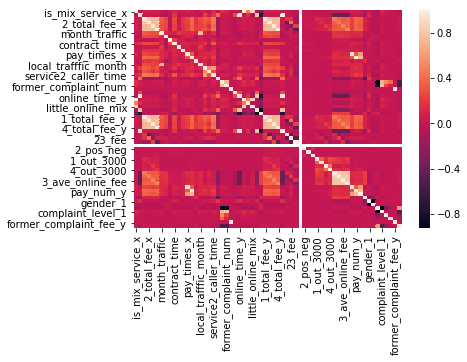

In [281]:
import seaborn as sns
sns.heatmap(train4_x.corr())

In [317]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# train4_x_stand = scaler.fit_transform(train4_x)

train4_x_stand = train4_x

划分验证集和训练集

In [315]:
train4_tra_x = train4_x_stand[1:int(4/5*len(train4_x_stand))]
train4_val_x = train4_x_stand[int(4/5*len(train4_x_stand)):]

In [320]:
train4_tra_y = train4_y_le[1:int(4/5*len(train4_x_stand))]
train4_val_y = train4_y_le[int(4/5*len(train4_x_stand)):]

## 3G特征工程

In [ ]:
train3_id = train3[['user_id']]
train3_y = train3[['current_service']]
train3_x = train3.drop(['service_type', 'gender', 'age', 'user_id', 'current_service'], axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
train3_y_le = le1.fit_transform(train3_y['current_service'])

## 2I2C特征工程

In [521]:
train1_id = train1[['user_id']]
train1_y = train1[['current_service']]
train1_x = train1.drop(['service_type', 'gender', 'user_id', 'current_service'], axis=1)

In [522]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
train1_y_le = le1.fit_transform(train1_y['current_service'])

In [523]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# train1_x_stand = scaler.fit_transform(train1_x)

train1_x_stand = train1_x

In [524]:
train1_tra_x = train1_x_stand[1:int(4/5*len(train1_x_stand))]
train1_val_x = train1_x_stand[int(4/5*len(train1_x_stand)):]

In [525]:
train1_tra_y = train1_y_le[1:int(4/5*len(train1_x_stand))]
train1_val_y = train1_y_le[int(4/5*len(train1_x_stand)):]

# 预测

> 4G数据集 **验证集** train4_tra_x train4_tra_y **验证集** train4_val_x train4_val_y

> 2I2C数据集 **验证集** train1_tra_x train1_tra_y **验证集**train1_val_x train1_val_y

### RF OVR

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

rf4 = RandomForestClassifier(n_estimators=200, verbose=0, n_jobs=2)
ovc4 = OneVsRestClassifier(rf4)

In [ ]:
ovc4.fit(train4_tra_x, train4_tra_y)

In [ ]:
pre_val4 = ovc4.predict(train4_val_x)

In [ ]:
pre_val4 = le4.inverse_transform(pre_val4)

In [294]:
validation4 = train4_id[int(4/5*len(train4_x_stand)):]
validation4['predict_service'] = pre_val4

NameError: name 'pre_val4' is not defined

In [ ]:
val_y4 = train4_id[int(4/5*len(train4_x_stand)):]
val_y4['current_service'] = le4.inverse_transform(train4_val_y)

In [ ]:
score(val_y4, validation4)

## 预测2I2C数据集

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

rf1 = RandomForestClassifier(n_estimators=500, verbose=1)
ovc1 = OneVsRestClassifier(rf1)

In [ ]:
ovc1.fit(train1_tra_x, train1_tra_y)

In [ ]:
pre_val1 = ovc1.predict(train1_val_x)

In [ ]:
pre_val1 = le1.inverse_transform(pre_val1)

In [ ]:
validation1 = train1_id[int(4/5*len(train1_x_stand)):]
validation1['predict_service'] = pre_val1

In [ ]:
val_y1 = train1_id[int(4/5*len(train1_x_stand)):]
val_y1['current_service'] = le1.inverse_transform(train1_val_y)

In [ ]:
score(val_y1, validation1)

### 2I2C数据集

In [ ]:
dataset1 = xgb.DMatrix(train1_tra_x, label=train1_tra_y)
val_data1 = xgb.DMatrix(train1_val_x)

In [ ]:
xgb1 = xgb.sklearn.XGBClassifier(objective='multi:softmax', silent=False, n_jobs=2, n_estimator=100)

In [ ]:
xgb1.fit(train1_tra_x, train1_tra_y)

In [ ]:
val_xgb1 = xgb1.predict(train1_val_x)

In [ ]:
val_y1 = train1_id[int(4/5*len(train1_x_stand)):]
val_y1['current_service'] = le1.inverse_transform(val_xgb1)

## LightGBM

In [216]:
import lightgbm as lgb

train_data4 = lgb.Dataset(train4_tra_x, label=train4_tra_y)
validate_data4 = lgb.Dataset(train4_val_x, train4_val_y)

NameError: name 'train4_tra_x' is not defined

In [496]:
params4 = {'learning_rate':0.1,
          'boosting': 'gbdt', 
          'lambda_l1':0.1,
          'lambda_l2':0.2,
          'max_depth':8,
          'num_leaves':200, 
          'objective':'multiclass',
          'num_class':11}

In [497]:
lgb4 = lgb.train(params4, train_data4, valid_sets=[validate_data4])

[1]	valid_0's multi_logloss: 2.03758
[2]	valid_0's multi_logloss: 1.81051
[3]	valid_0's multi_logloss: 1.63838
[4]	valid_0's multi_logloss: 1.49922
[5]	valid_0's multi_logloss: 1.38586
[6]	valid_0's multi_logloss: 1.28933
[7]	valid_0's multi_logloss: 1.2061
[8]	valid_0's multi_logloss: 1.13348
[9]	valid_0's multi_logloss: 1.06883
[10]	valid_0's multi_logloss: 1.0116
[11]	valid_0's multi_logloss: 0.96014
[12]	valid_0's multi_logloss: 0.914098
[13]	valid_0's multi_logloss: 0.872914
[14]	valid_0's multi_logloss: 0.835441
[15]	valid_0's multi_logloss: 0.801457
[16]	valid_0's multi_logloss: 0.770324
[17]	valid_0's multi_logloss: 0.742182
[18]	valid_0's multi_logloss: 0.717021
[19]	valid_0's multi_logloss: 0.693416
[20]	valid_0's multi_logloss: 0.67209
[21]	valid_0's multi_logloss: 0.652063
[22]	valid_0's multi_logloss: 0.633883
[23]	valid_0's multi_logloss: 0.616919
[24]	valid_0's multi_logloss: 0.601109
[25]	valid_0's multi_logloss: 0.58645
[26]	valid_0's multi_logloss: 0.573454
[27]	valid

In [498]:
val_lgb4 = lgb4.predict(train4_val_x)
val_lgb4 = [list(x).index(max(x)) for x in val_lgb4]

In [499]:
val_y4 = train4_id[int(4/5*len(train4_x_stand)):]
val_y4['current_service'] = le4.inverse_transform(val_lgb4)

D:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [500]:
score(val_y4, validation4)

0.9494212779451403 89016252
0.8068156671830051 99999827
0.8899260628465804 89950167
0.9253220611916265 89950166
0.9416701636592529 89950168
0.8442191954387076 99999828
0.8342749529190208 99999826
0.9377876763177431 99999825
0.8385933273219115 89016259
0.8571428571428571 89016253
0.7751977545292167 99999830


0.7617117625648232

In [501]:
print(pd.DataFrame({
        'column': train4_feature,
        'importance': lgb4.feature_importance(),
    }).sort_values(by='importance'))

                    column  importance
30           1_total_fee_y           0
60  former_complaint_fee_y           0
31           2_total_fee_y           0
32           3_total_fee_y           0
33           4_total_fee_y           0
34             online_time           0
38               1_pos_neg           0
39               2_pos_neg           0
25        is_mix_service_y           0
40               3_pos_neg           0
42              1_out_3000           0
43              2_out_3000           0
44              3_out_3000           0
45              4_out_3000           0
50             pay_times_y           0
51               pay_num_y           0
59       complaint_level_3           0
41               4_pos_neg           0
24           online_time_y           0
61                former_0           7
28      many_online_notmix          13
56       complaint_level_0          35
58       complaint_level_2          39
29    little_online_notmix          53
26         many_online_mi

In [526]:
train_data1 = lgb.Dataset(train1_tra_x, label=train1_tra_y)
validate_data1 = lgb.Dataset(train1_val_x, train1_val_y)

In [527]:
params1 = {'learning_rate':0.1,
          'boosting': 'gbdt', 
          'lambda_l1':0.1,
          'lambda_l2':0.2,
          'max_depth':8,
          'num_leaves':200, 
          'objective':'multiclass',
          'num_class':11}

In [528]:
lgb1 = lgb.train(params1, train_data1, valid_sets=[validate_data1])

[1]	valid_0's multi_logloss: 0.74918
[2]	valid_0's multi_logloss: 0.665365
[3]	valid_0's multi_logloss: 0.593079
[4]	valid_0's multi_logloss: 0.530341
[5]	valid_0's multi_logloss: 0.475617
[6]	valid_0's multi_logloss: 0.427553
[7]	valid_0's multi_logloss: 0.385222
[8]	valid_0's multi_logloss: 0.347515
[9]	valid_0's multi_logloss: 0.314144
[10]	valid_0's multi_logloss: 0.284475
[11]	valid_0's multi_logloss: 0.257923
[12]	valid_0's multi_logloss: 0.23447
[13]	valid_0's multi_logloss: 0.213301
[14]	valid_0's multi_logloss: 0.194373
[15]	valid_0's multi_logloss: 0.177384
[16]	valid_0's multi_logloss: 0.162145
[17]	valid_0's multi_logloss: 0.148391
[18]	valid_0's multi_logloss: 0.135975
[19]	valid_0's multi_logloss: 0.124818
[20]	valid_0's multi_logloss: 0.114846
[21]	valid_0's multi_logloss: 0.10577
[22]	valid_0's multi_logloss: 0.09756
[23]	valid_0's multi_logloss: 0.0901667
[24]	valid_0's multi_logloss: 0.0834894
[25]	valid_0's multi_logloss: 0.0774489
[26]	valid_0's multi_logloss: 0.071

In [529]:
val_lgb1 = lgb1.predict(train1_val_x)
val_lgb1 = [list(x).index(max(x)) for x in val_lgb1]

In [530]:
validation1 = train1_id[int(4/5*len(train1_x_stand)):]
validation1['predict_service'] = le1.inverse_transform(val_lgb1)

D:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [531]:
val_y1 = train1_id[int(4/5*len(train1_x_stand)):]
val_y1['current_service'] = le1.inverse_transform(train1_val_y)

D:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [532]:
score(val_y1, validation1)

0.9941081160701134 90109916
0.9967853928249967 90063345
0.9657579787234042 90155946


0.971309779915197

## GBDT

# 评分函数

In [292]:
def score(tr, te):
    labels = tr['current_service'].unique()
    f1_score = 0
    for label in labels:
        tp = 0
        fp = 0
        fn = 0
        sub_tr = tr[tr['current_service'] == label]['current_service']
        index_tr = tr[tr['current_service'] == label].index.tolist()
        sub_te = te['predict_service'][index_tr]
        for la in sub_te.values:
            if la == label:
                tp = tp + 1
            else:
                fn = fn + 1
        index_te = te[te['predict_service'] == label].index.tolist()
        fp_list = set(index_te).difference(index_tr)
        fp = len(fp_list)
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        f1_score = f1_score + (2*precision*recall)/(precision+recall)
        print((2*precision*recall)/(precision+recall), label)
    final_score = (1/(len(labels))*f1_score)**2
    
    return final_score

其中99999830最低

In [207]:
score(val_y4, validation4)

0.9381666533001844 89016252
0.7192468619246861 99999827
0.7986928104575163 99999828
0.8617624026901286 89950167
0.9104787976099602 89950166
0.9416833667334669 89950168
0.7592385218365062 99999826
0.9301611665387568 99999825
0.73224043715847 89016259
0.7802359882005899 89016253
0.6699441340782122 99999830


0.6756617524584807

# 不分割数据集

rf 得出的分数为0.58

In [509]:
train['gender'][train['gender'] == '\\N'] = 1
train['gender'][train['gender'] == '00'] = 0
train['gender'][train['gender'] == '01'] = 1
train['gender'][train['gender'] == '02'] = 2
train_all = feature_engineer(train)

In [510]:
train_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612652 entries, 0 to 612651
Data columns (total 81 columns):
service_type              612652 non-null int64
is_mix_service_x          612652 non-null int64
online_time_x             612652 non-null int64
1_total_fee_x             612652 non-null float64
2_total_fee_x             612652 non-null float64
3_total_fee_x             612652 non-null float64
4_total_fee_x             612652 non-null float64
month_traffic             612652 non-null float64
many_over_bill            612652 non-null int64
contract_type             612652 non-null int64
contract_time             612652 non-null int64
is_promise_low_consume    612652 non-null int64
net_service               612652 non-null int64
pay_times_x               612652 non-null int64
pay_num_x                 612652 non-null float64
last_month_traffic        612652 non-null float64
local_trafffic_month      612652 non-null float64
local_caller_time         612652 non-null float64
service

In [511]:
train_id = train_all[['user_id']]
train_y = train_all[['current_service']]
train_x = train_all.drop(['current_service', 'gender', 'age', 'user_id'], axis=1)

In [512]:
from sklearn.preprocessing import LabelEncoder
le_all = LabelEncoder()
train_y = le_all.fit_transform(train_y['current_service'])

In [513]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x_stand = scaler.fit_transform(train_x)

In [514]:
train_tra_x = train_x_stand[1:int(4/5*len(train_x_stand))]
train_val_x = train_x_stand[int(4/5*len(train_x_stand)):]

In [515]:
train_tra_y = train_y[1:int(4/5*len(train_x_stand))]
train_val_y = train_y[int(4/5*len(train_x_stand)):]

In [516]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

rf_all = RandomForestClassifier(n_estimators=200, verbose=1, n_jobs=2)
ovc_all = OneVsRestClassifier(rf_all)

In [517]:
ovc_all.fit(train_tra_x, train_tra_y)

[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   21.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.5min
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:  1.6min finished
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   17.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:  1.3min finished
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   17.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:  1.3min finished
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   26.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:  1.8min finished
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   25.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:  1.8min finished
[Parallel(n_jobs=2)]: Done  46 tasks    

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=2,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False),
          n_jobs=1)

In [518]:
pre_val = ovc_all.predict(train_val_x)

[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    1.3s finished
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    1.4s finished
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    2.7s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    2.7s finished
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    2.4s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    2.4s finished
[Parallel(n_jobs=2)]: Done  46 tasks    

In [519]:
pre_val = le_all.inverse_transform(pre_val)

In [520]:
validation = train_id[int(4/5*len(train_x_stand)):]
validation['predict_service'] = pre_val

In [521]:
val_y = train_id[int(4/5*len(train_x_stand)):]
val_y['current_service'] = le_all.inverse_transform(train_val_y)

In [532]:
score(val_y, validation)

0.7110855829982768 99999827
0.9215628795175679 89016252
1.0 99104722
0.8413781242834212 89950167
0.7177724303884496 89016259
0.7825072474015414 99999828
0.6722838137472285 99999830
0.8982960596379127 89950166
0.9169606114050559 89950168
0.7496051938936655 99999826
0.9897119341563787 90063345
0.9827586206896551 90109916
0.7335130278526505 89016253
0.922964998787487 99999825
0.9325153374233129 90155946


0.7250994649884266

In [522]:
test_all = feature_engineer(test)

In [523]:
test_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262565 entries, 0 to 262564
Data columns (total 80 columns):
service_type              262565 non-null int64
is_mix_service_x          262565 non-null int64
online_time_x             262565 non-null int64
1_total_fee_x             262565 non-null float64
2_total_fee_x             262565 non-null float64
3_total_fee_x             262565 non-null float64
4_total_fee_x             262565 non-null float64
month_traffic             262565 non-null float64
many_over_bill            262565 non-null int64
contract_type             262565 non-null int64
contract_time             262565 non-null int64
is_promise_low_consume    262565 non-null int64
net_service               262565 non-null int64
pay_times_x               262565 non-null int64
pay_num_x                 262565 non-null float64
last_month_traffic        262565 non-null float64
local_trafffic_month      262565 non-null float64
local_caller_time         262565 non-null float64
service

In [524]:
test_id = test_all[['user_id']]
test_x = test_all.drop(['gender', 'age', 'user_id'], axis=1)

In [525]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
test_x_stand = scaler.fit_transform(test_x)

In [526]:
pre_val = ovc_all.predict(test_x_stand)

[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    2.9s finished
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    2.5s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    2.6s finished
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    2.5s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    2.6s finished
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    4.0s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    4.1s finished
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    3.7s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    3.8s finished
[Parallel(n_jobs=2)]: Done  46 tasks    

In [527]:
pre_val = le_all.inverse_transform(pre_val)

In [528]:
pred = test_id
pred['predict_service'] = pre_val

In [529]:
pred.to_csv('all_rf918.csv', index=None)